### Итоговое задание Александра Соколова
### по Проекту 8. Возьмёте Бэтмобиль? 
####    Юнит 9. NLP/Computer Vision  (отредактирован 17.02.2021)
---

# 1. Импорты библиотек, инициализация глобальных констант, контроль инициализации пакетов и оборудования
## 1.1. Импорты библиотек

In [100]:
import os
from datetime import datetime as dt
import numpy as np
import pandas as pd
import math
import sys
import random as rn

# import tensorflow as tf
# from tensorflow.keras.applications.xception import Xception
# from tensorflow.keras import Sequential as S
# from tensorflow.keras.layers import *
# from tensorflow.keras import optimizers
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3
# from keras import backend as K

print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)
# print('Tensorflow   :', tf.__version__)
# print('Keras        :', tf.keras.__version__)

Python       : 3.8.5 (default, Jul 28 2020, 12:59:40) 
Numpy        : 1.19.4


In [101]:
import utils_module06022021 as utils

## 1.2. Глобальные константы

In [102]:
CURRENT_DIR = './'  # имя текущей директории для локальной машины 
# CURRENT_DIR = '../'  # имя текущей директории для каггл

# проверка пути в папке input для корректного назначения глобальной константы PATH_TO_FILE
print(os.listdir(CURRENT_DIR+'input/'))

['sf-dst-car-price-prediction-part2', 'module8']


In [103]:
PATH_to_FILE = CURRENT_DIR+'input/sf-dst-car-price-prediction-part2/'  # имя директории с исходными файлами
PATH_to_WORKDIR = CURRENT_DIR+'working/'  # имя рабочей директории

RANDOM_SEED = 42  # фиксируем состояние генератора псевдо-случайных чисел для воспроизводимости результата
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = '0'
rn.seed(RANDOM_SEED)

!pip3 freeze > requirements.txt  # фиксируем версии всех пакетов для воспроизводимости результата

CURRENT_DATE = dt.now().strftime('[%d.%m.%Y]')  # фиксируем текущую дату для контроля версий экспериментов

## 1.3. Проверка подключения GPU

In [104]:
# # утилита проверяет подключение GPU
# utils.check_GPU_ON()

# 2. Импорт и предобработка данных
## 2.1. Импорт данных

In [105]:
df_train = pd.read_csv(PATH_to_FILE + 'train.csv')
df_test = pd.read_csv(PATH_to_FILE + 'test.csv')
df_submit = pd.read_csv(PATH_to_FILE + 'sample_submission.csv')

pd.set_option('display.max_columns', None)
print('Размерность тренировочного датасета: ', df_train.shape)
display(df_train.head(2))
print('Размерность тестового датасета: ', df_test.shape)
display(df_test.head(2))
print('Размерность датасета c примером сабмишена: ', df_submit.shape)
display(df_submit.head(2))

Размерность тренировочного датасета:  (6682, 22)


bodyType brand        color  \
0    седан   BMW       чёрный   
1    седан  AUDI  серебристый   

                                         description engineDisplacement  \
0  Авто на бодром ходу.  Все работает отлично.  П...            3.0 LTR   
1  Продажа от собственника, второй владелец, ПТС ...            2.8 LTR   

  enginePower fuelType  mileage  modelDate model_info  \
0     272 N12   бензин   245000       2007        5ER   
1     204 N12   бензин   183000       2011         A6   

                          name  numberOfDoors     price  productionDate  \
0  530xi 3.0 AT (272 л.с.) 4WD              4  599000.0            2007   
1           2.8 CVT (204 л.с.)              4  850000.0            2011   

      sell_id vehicleConfiguration vehicleTransmission    Владельцы  \
0  1099980990  SEDAN AUTOMATIC 3.0      автоматическая  3 или более   
1  1095836906   SEDAN VARIATOR 2.8            вариатор  2 владельца   

            Владение       ПТС    Привод   Руль  
0                NaN  Оригинал    полный  Левый  
1  8 лет и 6 месяцев  Оригинал  передний  Левый

Размерность тестового датасета:  (1671, 21)


bodyType     brand   color  \
0  универсал 5 дв.  MERCEDES  чёрный   
1             купе       BMW   белый   

                                         description engineDisplacement  \
0  Всем привет!\n\nПродам эксклюзивный проект 124...            3.0 LTR   
1  Продаю любимейшую тачилу.. Обвес и тюнинг Hamm...            3.0 LTR   

  enginePower fuelType  mileage  modelDate model_info  \
0     220 N12   бензин   350000       1984       W124   
1     313 N12   дизель    15000       2011        6ER   

                                 name  numberOfDoors  productionDate  \
0               300 3.0 AT (220 л.с.)              5            1991   
1  640d xDrive 3.0d AT (313 л.с.) 4WD              2            2013   

      sell_id         vehicleConfiguration vehicleTransmission    Владельцы  \
0  1099427284  WAGON_5_DOORS AUTOMATIC 3.0      автоматическая  3 или более   
1  1096405886          COUPE AUTOMATIC 3.0      автоматическая   1 владелец   

            Владение       ПТС  Привод   Руль  
0   6 лет и 3 месяца  Оригинал  задний  Левый  
1  6 лет и 6 месяцев  Оригинал  полный  Левый

Размерность датасета c примером сабмишена:  (1671, 2)


sell_id  price
0  1099427284      0
1  1096405886      0

### 2.2. Слияние датасетов в один

In [106]:
# сравним датасеты перед слиянием
utils.check_df_before_merg(df_train, df_test)

# уник_1                                  в первой строке_1    тип_1  \
0         17                                              седан   object   
1          3                                                BMW   object   
2         16                                             чёрный   object   
3       6147  Авто на бодром ходу.  Все работает отлично.  П...   object   
4         48                                            3.0 LTR   object   
5        146                                            272 N12   object   
6          4                                             бензин   object   
7       2900                                             245000    int64   
8         41                                               2007    int64   
9        118                                                5ER   object   
10       900                        530xi 3.0 AT (272 л.с.) 4WD   object   
11         4                                                  4    int64   
12      1628                                             599000  float64   
13        38                                               2007    int64   
14      6682                                         1099980990    int64   
15       288                                SEDAN AUTOMATIC 3.0   object   
16         4                                     автоматическая   object   
17         3                                        3 или более   object   
18       173                                                NaN   object   
19         2                                           Оригинал   object   
20         3                                             полный   object   
21         2                                              Левый   object   

          имя признака_1        имя признака_2   тип_2  \
0               bodyType              bodyType  object   
1                  brand                 brand  object   
2                  color                 color  object   
3            description           description  object   
4     engineDisplacement    engineDisplacement  object   
5            enginePower           enginePower  object   
6               fuelType              fuelType  object   
7                mileage               mileage   int64   
8              modelDate             modelDate   int64   
9             model_info            model_info  object   
10                  name                  name  object   
11         numberOfDoors         numberOfDoors   int64   
12                 price                   NaN     NaN   
13        productionDate        productionDate   int64   
14               sell_id               sell_id   int64   
15  vehicleConfiguration  vehicleConfiguration  object   
16   vehicleTransmission   vehicleTransmission  object   
17             Владельцы             Владельцы  object   
18              Владение              Владение  object   
19                   ПТС                   ПТС  object   
20                Привод                Привод  object   
21                  Руль                  Руль  object   

                                    в первой строке_2  # уник_2  
0                                     универсал 5 дв.      14.0  
1                                            MERCEDES       3.0  
2                                              чёрный      15.0  
3   Всем привет!\n\nПродам эксклюзивный проект 124...    1540.0  
4                                             3.0 LTR      43.0  
5                                             220 N12     120.0  
6                                              бензин       4.0  
7                                              350000     935.0  
8                                                1984      37.0  
9                                                W124     101.0  
10                              300 3.0 AT (220 л.с.)     536.0  
11                                                  5       4.0  
12                                                NaN       Na

Резюме:
 1. Не совпали типы в:= 1 столбцах

2. Уникальные значения заоблачно различаются в:= 3 столбцах [3, 7, 14]


имя признака_1 не совпадают типы  имя признака_2
index                                                 
12             price      float64!=nan             NaN

In [107]:
# ВАЖНО! для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['Train'] = 1 # помечаем где у нас трейн
df_test['Train'] = 0 # помечаем где у нас тест

df = df_train.append(df_test, sort=False).reset_index(drop=True) # объединяем
#!Обратите внимание объединение датасетов является потенциальной опасностью для даталиков

# Model 1: Создадим "наивную" модель 
Эта модель будет предсказывать среднюю цену по модели и году выпуска. 
C ней будем сравнивать другие модели.

In [ ]:
# split данных
temp_df = df_train[df_train['Train'] == 1]
train, test = train_test_split(temp_df, test_size=0.15, shuffle=True, random_state=RANDOM_SEED)

## 2.2. Предобработка данных

In [7]:
# создание в рабочей папке отдельной папки для разъархивированных картинок авто
PATH_to_IMAGES = utils.mkdir(PATH_to_WORKDIR, 'images_of_car')

Директория с именем (images_of_car) успешно создана в (../working/).
Путь к новой папке (../working/images_of_car/) возвращен в переменную.


In [8]:
utils.unzip(PATH_to_FILE, 
            PATH_to_IMAGES, 
            ['train.zip', 'test.zip'], 
            'с картинками авто')

Распаковываем zip-архивы с картинками авто:
1. train.zip..................... Распакован.
2. test.zip...................... Распакован.
===
Текущее состояние папки (../working/images_of_car/):= ['test_upload', 'train']


In [9]:
# создаем дополнительные константы для путей к тренировочным и тестовым фото
PATH_to_IMAGES_TRAIN = PATH_to_IMAGES + 'train/'
PATH_to_IMAGES_TEST = PATH_to_IMAGES + 'test_upload/'

# 3. Разведовательный анализ данных (EDA)
## 3.1. Статистический анализ

In [10]:
df_train.head()

Id  Category
0  100155.jpg         0
1  100306.jpg         0
2  100379.jpg         0
3  100380.jpg         0
4  100389.jpg         0

In [11]:
print('Краткая информация о тренировочном датасете')
utils.describe_without_plots_all_collumns(df_train, 
                                          short=True)

Краткая информация о тренировочном датасете


имя признака     тип # значений # пропусков(NaN) # уникальных минимум  \
0           Id  object      15561                0        15561     NaN   
1     Category   int64      15561                0           10       0   

  среднее макс медиана  
0     NaN  NaN     NaN  
1   4.337    9       4

In [12]:
print('Посмотрим какие категории представлены:')
df_train.Category.unique()

Посмотрим какие категории представлены:


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

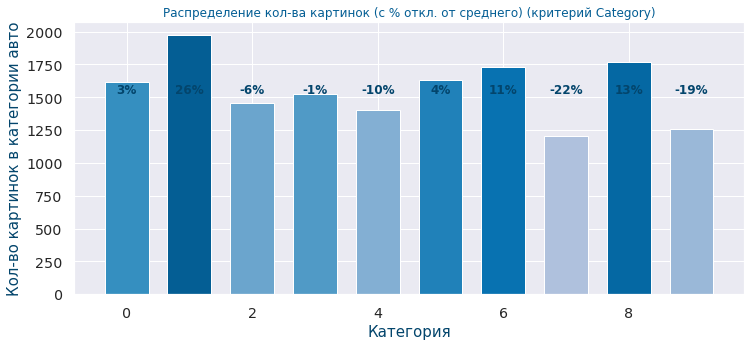

In [13]:
utils.simple_plot_barv('Распределение кол-ва картинок (с % откл. от среднего)', 
                       'Category', 
                       df_train, 
                       1.3, 
                       'Категория', 
                       'Кол-во картинок в категории авто')

In [14]:
df_submit.head()

Id  Category
0  305108.jpg         0
1  295075.jpg         0
2   31197.jpg         0
3   93598.jpg         0
4   87877.jpg         0

In [15]:
print('Краткая информация о датасете с шаблоном сабмишена')
utils.describe_without_plots_all_collumns(df_submit, 
                                          short=True)

Краткая информация о датасете с шаблоном сабмишена


имя признака     тип # значений # пропусков(NaN) # уникальных минимум  \
0           Id  object       6675                0         6675     NaN   
1     Category   int64       6675                0            1       0   

  среднее макс медиана  
0     NaN  NaN     NaN  
1       0    0       0

#### 3.2. Визуальный анализ картинок

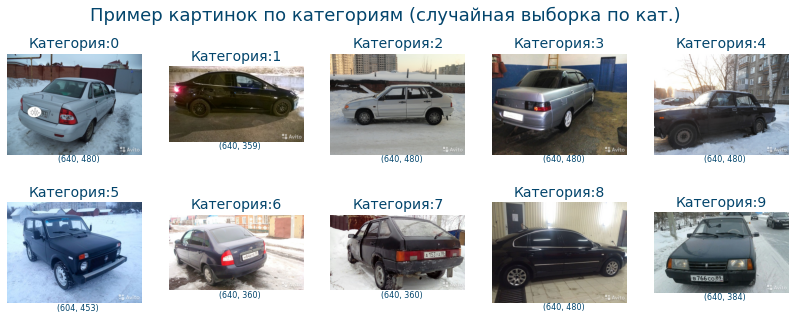

In [16]:
utils.images_from_dataset_with_path('Пример картинок по категориям (случайная выборка по кат.)', 
                                    'Категория:',
                                    PATH_to_IMAGES_TRAIN, 
                                    df_train, 
                                    'Category', 
                                    range(10), 
                                    'Id', 
                                    RANDOM_SEED, 
                                    True)

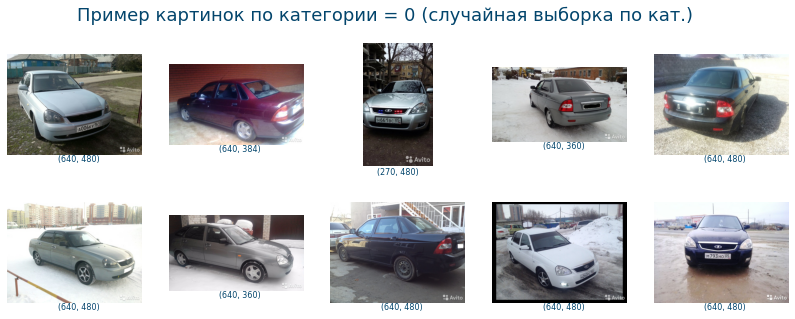

In [17]:
utils.images_from_dataset_with_path('Пример картинок по категории = 0 (случайная выборка по кат.)', 
                                    '',
                                    PATH_to_IMAGES_TRAIN, 
                                    df_train, 
                                    'Category', 
                                    np.zeros(10, dtype=int), 
                                    'Id', 
                                    RANDOM_SEED+2, 
                                    False)

0 категория = Lada Priora

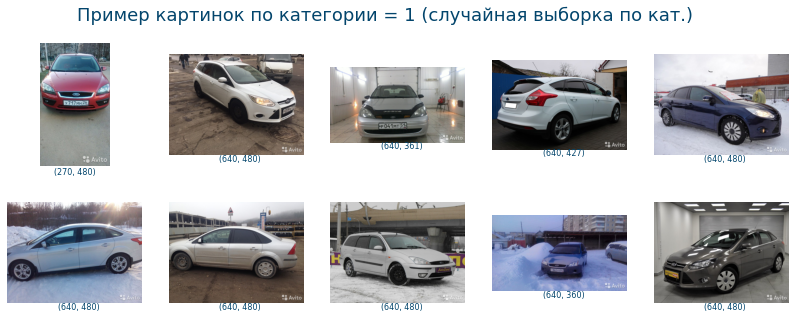

In [18]:
utils.images_from_dataset_with_path('Пример картинок по категории = 1 (случайная выборка по кат.)', 
                                    '',
                                    PATH_to_IMAGES_TRAIN, 
                                    df_train, 
                                    'Category', 
                                    np.ones(10, dtype=int), 
                                    'Id', 
                                    RANDOM_SEED, 
                                    False)

1 категория = Ford Focus

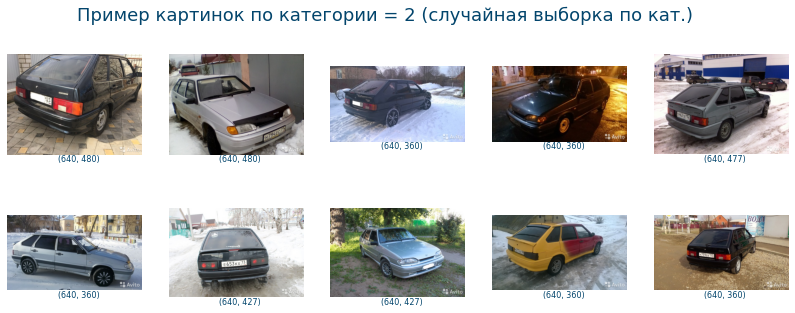

In [19]:
utils.images_from_dataset_with_path('Пример картинок по категории = 2 (случайная выборка по кат.)', 
                                    '',
                                    PATH_to_IMAGES_TRAIN, 
                                    df_train, 
                                    'Category', 
                                    np.ones(10, dtype=int)*2, 
                                    'Id', 
                                    RANDOM_SEED, 
                                    False)

2 категория = Lada Samara 2114

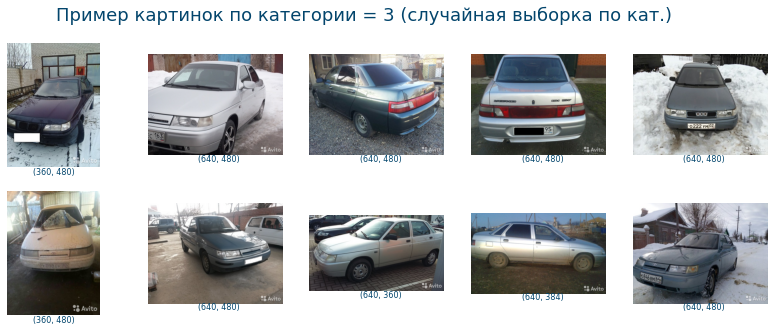

In [20]:
utils.images_from_dataset_with_path('Пример картинок по категории = 3 (случайная выборка по кат.)', 
                                    '',
                                    PATH_to_IMAGES_TRAIN, 
                                    df_train, 
                                    'Category', 
                                    np.ones(10, dtype=int)*3, 
                                    'Id', 
                                    RANDOM_SEED+1, 
                                    False)

3 категория = Lada 110

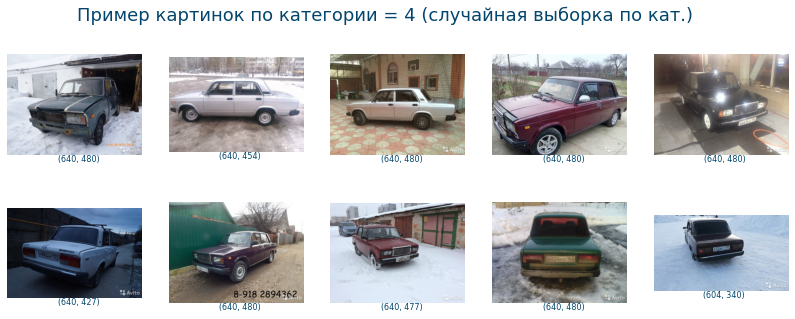

In [21]:
utils.images_from_dataset_with_path('Пример картинок по категории = 4 (случайная выборка по кат.)', 
                                    '',
                                    PATH_to_IMAGES_TRAIN, 
                                    df_train, 
                                    'Category', 
                                    np.ones(10, dtype=int)*4, 
                                    'Id', 
                                    RANDOM_SEED, 
                                    False)

4 категория = Lada 2107

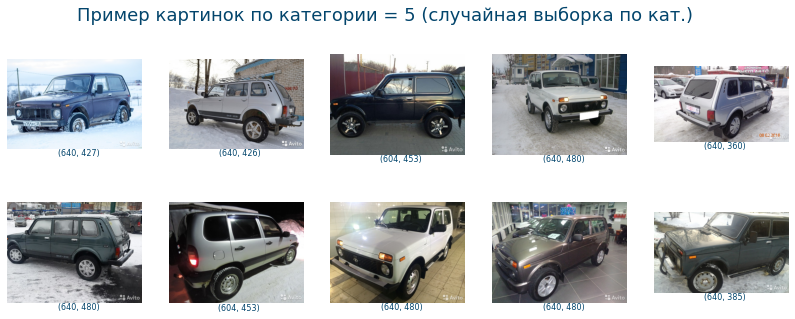

In [22]:
utils.images_from_dataset_with_path('Пример картинок по категории = 5 (случайная выборка по кат.)', 
                                    '',
                                    PATH_to_IMAGES_TRAIN, 
                                    df_train, 
                                    'Category', 
                                    np.ones(10, dtype=int)*5, 
                                    'Id', 
                                    RANDOM_SEED, 
                                    False)

5 категория - Lada Niva

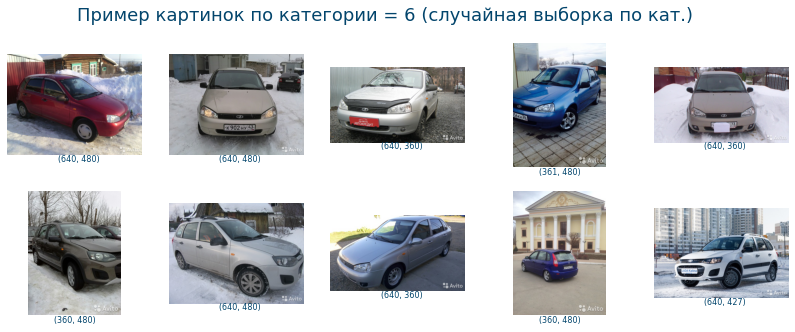

In [23]:
utils.images_from_dataset_with_path('Пример картинок по категории = 6 (случайная выборка по кат.)', 
                                    '',
                                    PATH_to_IMAGES_TRAIN, 
                                    df_train, 
                                    'Category', 
                                    np.ones(10, dtype=int)*6, 
                                    'Id', 
                                    RANDOM_SEED, 
                                    False)

6 категория - Lada Kalina

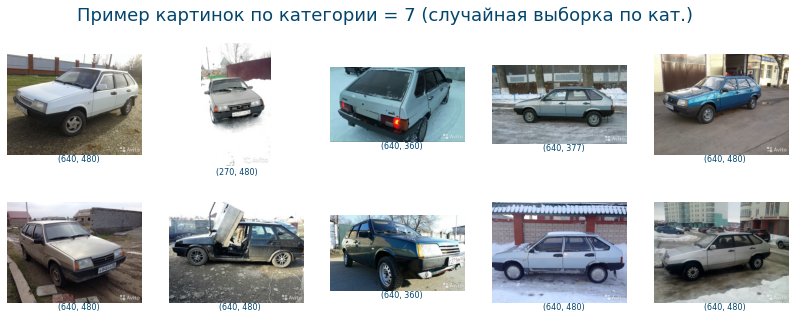

In [24]:
utils.images_from_dataset_with_path('Пример картинок по категории = 7 (случайная выборка по кат.)', 
                                    '',
                                    PATH_to_IMAGES_TRAIN, 
                                    df_train, 
                                    'Category', 
                                    np.ones(10, dtype=int)*7, 
                                    'Id', 
                                    RANDOM_SEED, 
                                    False)

7 категория - Lada Samara 2109

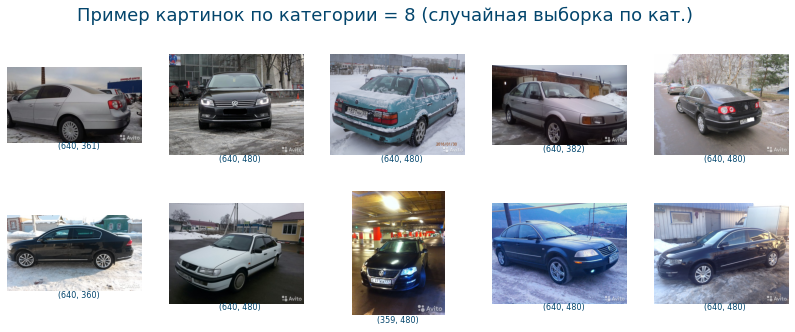

In [25]:
utils.images_from_dataset_with_path('Пример картинок по категории = 8 (случайная выборка по кат.)', 
                                    '',
                                    PATH_to_IMAGES_TRAIN, 
                                    df_train, 
                                    'Category', 
                                    np.ones(10, dtype=int)*8, 
                                    'Id', 
                                    RANDOM_SEED, 
                                    False)

8 категория - Volkswagen Passat

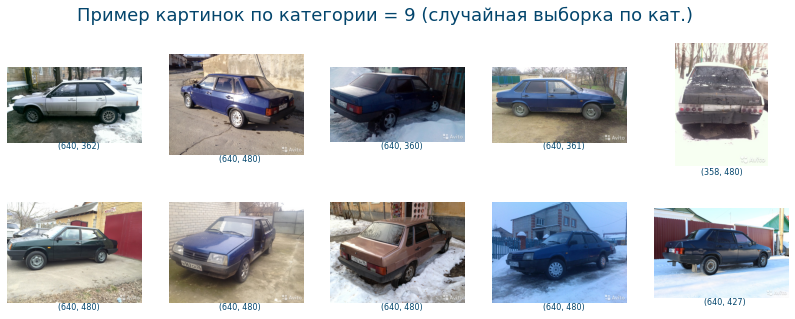

In [26]:
utils.images_from_dataset_with_path('Пример картинок по категории = 9 (случайная выборка по кат.)', 
                                    '',
                                    PATH_to_IMAGES_TRAIN, 
                                    df_train, 
                                    'Category', 
                                    np.ones(10, dtype=int)*9, 
                                    'Id', 
                                    RANDOM_SEED, 
                                    False)

9 категория - Lada Samara 21099

Резюме: 
- Для классификации представлены фотографии 10 категорий авто Lada
- Категории достаточно сбалансированны по кол-ву фото
- Размеры фотографий различаются, но в основном 640 на 480. Цветные.
- Всего 22236 фото в том числе:15561 фото в трейне и 6675 в тесте
- Кол-во фото в трейне не достаточно для хорошего обучения модели нейронной сети, поэтому будем применять различные виды аугментации данных

# 4. Инициализация датасета для хранения ВСЕХ! гиперпараметров и результатов экспериментов
Создание и обучение модели включает в себя несколько этапов:
- аугментацию данных (AUG)
- загрузку основы для модели (M)
- создание архитектуры головы (H)
- компиляция модели (C)
- предварительное обучение модели - это этап многочисленных небольших по продолжительности экспериментов для определения предварительных оптимальных параметров для обучения модели
- дообучение модели Fine-tuning  

На каждом этапе нам потребуются какие-то гиперпараметры. К сожалению сохранение модели в формате h5(hdf5) сохраняет только частично информацию с этапов (M) и (H) с обученными весами модели. Мне оказалось этого не достаточно для анализа оптимальных гиперпараметров поэтому я решил создать датасет с результатами (R) экспериментов.

In [27]:
results_of_exp = pd.DataFrame()  # датафрейм для хранения гиперпараметров и результатов экспериментов
descr_hyperp_of_exp = {}  # словарь для хранения описания гиперпараметров

# загружаем результаты предыдущих экспериментов в датасет, 
# в словарь загружаем описание параметров экспериметов
# инициализируем новый эксперимент
NUM_EXP, \
results_of_exp, \
descr_hyperp_of_exp = utils.load_result_last_cnn_fit(PATH_to_FILE_RESULT, 
                                                     PATH_to_FILE_descr)

# Строка ниже закомментирована, так как используется только в первый запуск ноутбука, 
# когда результатов экспериментов нет
# NUM_EXP = utils.hyperp('NUM_EXP',1,'Номер эксперимента',results_of_exp,descr_hyperp_of_exp)  # инициализация всех гиперпараметров происходит через специальный метод

Инициализация нового эксперимента после загрузки результатов предыдущих экспериментов
NUM_EXP = 57 ...


# 5. Предварительная обработка фотографий для обучения модели (аугментация)

In [28]:
print('Инициализация гиперпараметров для Аугментации фото:')
AUG_ROTATION_RANGE = utils.hyperp('AUG_ROTATION_RANGE', 
                                  5, 
                                  'Аугментация. Диапазон для случайных поворотов в градусах',
                                  results_of_exp,
                                  descr_hyperp_of_exp)
AUG_BRIGHTNES_RANGE = utils.hyperp('AUG_BRIGHTNES_RANGE', 
                                   [0.5, 1.5], 
                                   'Аугментация. Диапазон выбора значения сдвига яркости',
                                   results_of_exp,
                                   descr_hyperp_of_exp)
AUG_WIDTH_SHIFT_RANGE = utils.hyperp('AUG_WIDTH_SHIFT_RANGE', 
                                     0.1, 
                                     'Аугментация. Диапазон выбора значения сдвига ширины',
                                     results_of_exp,
                                     descr_hyperp_of_exp)
AUG_HEIGHT_SHIFT_RANGE = utils.hyperp('AUG_HEIGHT_SHIFT_RANGE', 
                                      0.1, 
                                      'Аугментация. Диапазон выбора значения сдвига высоты',
                                      results_of_exp,
                                      descr_hyperp_of_exp)
AUG_HORIZONTAL_FLIP = utils.hyperp('AUG_HORIZONTAL_FLIP', 
                                   True, 
                                   'Аугментация. Логическое значение для произвольного  переворачивания по горизонтали',
                                   results_of_exp,
                                   descr_hyperp_of_exp)
AUG_RESCALE = utils.hyperp('AUG_RESCALE', 
                           1. / 255, 
                           'Аугментация. Коэффициент масштабирования. Мы умножаем данные на это значение (после применения всех других преобразований)',
                           results_of_exp,
                           descr_hyperp_of_exp)
AUG_VAL_SPLIT = utils.hyperp('AUG_VAL_SPLIT', 
                             0.15, 
                             'Аугментация. Доля выборки оставляемой для валидации вне тренировочной выборки',
                             results_of_exp,
                             descr_hyperp_of_exp)
AUG_IMG_SIZE = utils.hyperp('AUG_IMG_SIZE', 
                            224, 'Аугментация. Размер картинки, которую будем подавать в нейросеть',
                            results_of_exp,
                            descr_hyperp_of_exp)
AUG_BATCH_SIZE = utils.hyperp('AUG_BATCH_SIZE', 
                              64, 
                              'Аугментация. Размер Batch',
                              results_of_exp,
                              descr_hyperp_of_exp)

Инициализация гиперпараметров для Аугментации фото:
AUG_ROTATION_RANGE = 5 ...
AUG_BRIGHTNES_RANGE = [0.5, 1.5] ...
AUG_WIDTH_SHIFT_RANGE = 0.1 ...
AUG_HEIGHT_SHIFT_RANGE = 0.1 ...
AUG_HORIZONTAL_FLIP = True ...
AUG_RESCALE = 0.00392156862745098 ...
AUG_VAL_SPLIT = 0.15 ...
AUG_IMG_SIZE = 224 ...
AUG_BATCH_SIZE = 64 ...


In [29]:
print('Инициализация константы типа Аугментации')
AUG_TYPE = utils.hyperp('AUG_TYPE', 
                        'ImageDataGenerator', 
                        'Аугментация. Тип',
                        results_of_exp,
                        descr_hyperp_of_exp)

Инициализация константы типа Аугментации
AUG_TYPE = ImageDataGenerator ...


In [30]:
# Генерация аугментированных данных
train_generator, \
valid_generator, \
test_generator = utils.train_valid_test_generators(
                    AUG_ROTATION_RANGE,           
                    AUG_BRIGHTNES_RANGE,
                    AUG_WIDTH_SHIFT_RANGE, 
                    AUG_HEIGHT_SHIFT_RANGE,
                    AUG_HORIZONTAL_FLIP,
                    AUG_RESCALE,
                    AUG_VAL_SPLIT,
                    PATH_to_IMAGES_TRAIN,
                    PATH_to_IMAGES_TEST,
                    df_submit,
                    AUG_IMG_SIZE,
                    AUG_BATCH_SIZE,
                    RANDOM_SEED)

Found 13232 images belonging to 10 classes.
Found 2329 images belonging to 10 classes.
Found 6675 validated image filenames.


# 6. Создание и предобучение модели нейросети
## 6.1 Создание модели

In [31]:
print('Инициализация константы типа базовой модели')
M_BASE_TYPE = utils.hyperp('M_BASE_TYPE', 
                           'Xception', 
                           'Модель. Тип базовой модели',
                           results_of_exp,
                           descr_hyperp_of_exp)

Инициализация константы типа базовой модели
M_BASE_TYPE = Xception ...


In [32]:
# используем перенос обучения (Transfer learning)
# поэтому сначала загружаем предобученную базовую модель Xception без головы так как будем ставить свою
base_model = Xception(
                    weights='imagenet', 
                    include_top=False, 
                    input_shape = (AUG_IMG_SIZE, AUG_IMG_SIZE, 3))

83689472/83683744 [==============================] - 1s 0us/step


In [33]:
print('Инициализация констант архитектуры головы и компиляции модели') 
H_DROPOUT_RATE =  utils.hyperp('H_DROPOUT_RATE', 
                               0.25, 
                               'Голова модели. Вероятность отключения нейронов в слое Dropout',
                               results_of_exp,
                               descr_hyperp_of_exp)
H_USE_BIAS =  utils.hyperp('H_USE_BIAS', 
                           'Default', 
                           'Голова модели. Использование коэф Байес в полносвязном слое',
                           results_of_exp,
                           descr_hyperp_of_exp)
H_KERNEL_REG = utils.hyperp('H_KERNEL_REG', 
                            'Default', 
                            'Голова модели. Использование специальной регуляризации в полносвязном слое',
                            results_of_exp,
                            descr_hyperp_of_exp)
H_BATCHNORM =  utils.hyperp('H_BATCHNORM', 
                            False, 
                            'Голова модели. Использование BatchNormalization' ,
                            results_of_exp,
                            descr_hyperp_of_exp)

C_LR = utils.hyperp('C_LR', 
                    1e-4, 
                    'Компиляция модели. Шаг обучения модели',
                    results_of_exp,
                    descr_hyperp_of_exp)
С_OPTIMIZER_TYPE = utils.hyperp('С_OPTIMIZER_TYPE', 
                                'Adam', 
                                'Компиляция модели. Тип оптимайзера',
                                results_of_exp,
                                descr_hyperp_of_exp)
C_LOSS_TYPE = utils.hyperp('C_LOSS_TYPE', 
                           'categorical_crossentropy', 
                           'Компиляция модели. Тип функции потерь (loss-функции)',
                           results_of_exp,
                           descr_hyperp_of_exp)

Инициализация констант архитектуры головы и компиляции модели
H_DROPOUT_RATE = 0.25 ...
H_USE_BIAS = Default ...
H_KERNEL_REG = Default ...
H_BATCHNORM = False ...
C_LR = 0.0001 ...
С_OPTIMIZER_TYPE = Adam ...
C_LOSS_TYPE = categorical_crossentropy ...


In [34]:
# архитектура головы (классификационные слои поверх базовой модели)
head = S([GlobalAveragePooling2D(), 
          Dense(256,activation='relu'),
          Dropout(H_DROPOUT_RATE),
          Dense(10, activation='softmax')])
# обратите внимание, что тут повторяется архитектура baseline 
# только без функционального программирования


# Собираем модель используя подход перенос обучения (Transfer learning)
model = utils.model_assembler(base_model, head)

# Компилируем модель
model.compile(loss=C_LOSS_TYPE, 
              optimizer=optimizers.Adam(lr=C_LR), 
              metrics=['accuracy'])

In [35]:
# выводим краткую информацию о моделе
# стандартное саммари очень громоздкая портянка вниз и смотреть ее утомительно
# я нашел несколько визуализаторов нейросетей с достаточно полной информацией о слоях и функциях
# но они не корректно отображаются в каггл
# если вы знаете удобные способы визуализации моеделей, 
# тогда напишите пожалуйста мне или в комментариях к ноутбуку
utils.model_summary_short(model, 
                          base_model,
                          ' (из baseline)')

Краткая информация о моделе (из baseline):


Значение  \
--------Параметры модели -------                    
Всего параметров                       21,388,594   
Тренируемых параметров                 21,334,066   
Нетренируемых параметров                   54,528   
--------Слои модели--------                         
Всего слоев                                   136   
Тренируемых слоев (не заморожен.)             136   
Нетренируемых слоев (заморожен.)                0   
.. среди них слоев bn                           0   
Номер первого тренируемого слоя                 1   
--------Слои базовой модели--------                 
Всего слоев бм                                132   
Тренируемых слоев бм (не заморожен.)          132   
Нетренируемых слоев бм (заморожен.)             0   
... среди них слоев bn                          0   
% заморозки базовой модели                    0 %   
----Архитектура головы модели----                   
Всего слоев головы                              4   
Полносвязных слоев без выходного слоя           1   
BatchNormalization                           True   
Функция активации скрытого слоя              relu   
Функция активации выходного слоя          softmax   

                                                                          
--------Параметры модели -------            --------Params model--------  
Всего параметров                                            Total params  
Тренируемых параметров                                  Trainable params  
Нетренируемых параметров                            Non-trainable params  
--------Слои модели--------                 --------Layers model--------  
Всего слоев                                                 Total layers  
Тренируемых слоев (не заморожен.)           Trainable layers (no frozen)  
Нетренируемых слоев (заморожен.)           Non-trainable layers (frozen)  
.. среди них слоев bn                            .. among them layers bn  
Номер первого тренируемого слоя          Count num first trainable layer  
--------Слои базовой модели--------    --------Layers base model--------  
Всего слоев бм                                              Total layers  
Тренируемых слоев бм (не заморожен.)        Trainable layers (no frozen)  
Нетренируемых слоев бм (заморожен.)        Non-trainable layers (frozen)  
... среди них слоев bn                           .. among them layers bn  
% заморозки базовой модели                           % freeze base model  
----Архитектура головы модели----              ----Head architecture----  
Всего слоев головы                                          Total layers  
Полносвязных слоев без выходного слоя  Dense layers without output layer  
BatchNormalization                                    BatchNormalization  
Функция активации скрытого слоя         Activation func for hidden layer  
Функция активации выходного слоя        Activation func for output layer

## 6.2 Обучение модели

In [36]:
print('Инициализация констант обучения модели (из baseline)') 
M_EPOCHS = utils.hyperp('M_EPOCHS', 
                        5, 
                        'Модель. Кол-во эпох обучения модели',
                        results_of_exp,
                        descr_hyperp_of_exp)

M_CALLBACKS_TYPE = utils.hyperp('M_CALLBACKS_TYPE', 
                                'MC_T', 
                                'Модель. Тип callback: MC - ModelCheckpoint, ES - EarlyStopping, LRS - LearningRateScheduler, T - Time Callbacks',
                                results_of_exp,
                                descr_hyperp_of_exp)
M_EPOCHS_DROP = utils.hyperp('M_EPOCHS_DROP', 
                             2, 
                             'Модель. Кол-во эпох через которое LR изменяется внутри функции sheduler',
                             results_of_exp,
                             descr_hyperp_of_exp)
M_LR_UPDATE = utils.hyperp('M_LR_UPDATE', 
                           math.exp(-0.1), 
                           'Модель. Коэфф изменения LR функции sheduler',
                           results_of_exp,
                           descr_hyperp_of_exp)

Инициализация констант обучения модели (из baseline)
M_EPOCHS = 5 ...
M_CALLBACKS_TYPE = MC_T ...
M_EPOCHS_DROP = 2 ...
M_LR_UPDATE = 0.9048374180359595 ...


In [37]:
# Инициализация Callbacks 
time_cb = utils.TimingCallback()
callbacks_list = utils.callbacks_assembler(M_CALLBACKS_TYPE, 
                                           C_LR, 
                                           M_LR_UPDATE, 
                                           M_EPOCHS_DROP, 
                                           time_cb)

In [38]:
# код обучения закомментирован для удобства воспроизведения ноутбука
# ниже идет полная загрузка ранее сохраненной модели этого обучения
# и выводится картинка с прошлым процессом обучения для наглядности
# если вы захотите выполнить обучение модели, тогда закомментируйте код 
# загрузки ранее сохраненной лучшей из обученных моделей (строчкой ниже)

# # обучение модели (из baseline)
# right_steps_per_epoch = len(train_generator)

# history = model.fit_generator(train_generator,
#                               steps_per_epoch = right_steps_per_epoch,
#                               validation_data = valid_generator, 
#                               validation_steps = len(valid_generator),
#                               epochs = M_EPOCHS,
#                               callbacks = callbacks_list)

Загружена ранее сохраненная лучшая из обученных моделей (из baseline)


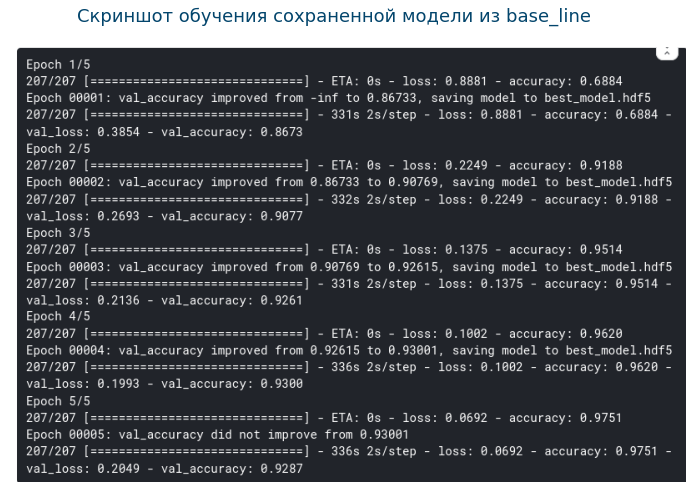

In [39]:
# загрузка ранее сохраненной модели из baseline
print('Загружена ранее сохраненная лучшая из обученных моделей (из baseline)')
model.load_weights('../input/last-result/best_model_25_20201220__07_47.hdf5')
utils.show_image('../input/last-result/pic_procces_model_fit_baseline_25.png',
                'Скриншот обучения сохраненной модели из base_line', 14, 8, 0.95)
history, time_cb = [], []
model.save('best_model.hdf5')

In [40]:
# загружаем лучшую модель и получаем значения метрик на валидационной выборке для результатов
print('Загружаем лучшую модель после обучения и проверяем метрики на валидационной выборке:')
model.load_weights('best_model.hdf5')
temp = model.evaluate_generator(valid_generator, verbose=1)

Загружаем лучшую модель после обучения и проверяем метрики на валидационной выборке:
37/37 [==============================] - 42s 1s/step - loss: 0.2083 - accuracy: 0.9304


In [41]:
print('Сохраняем метрики на лучшей моделе')
R_EVA_VAL_ACC = utils.hyperp('R_EVA_VAL_ACC', 
                             temp[1], 
                             'Результат обучения. Оценка метрики точности на лучшей моделе',
                             results_of_exp,
                             descr_hyperp_of_exp)
R_EVA_VAL_LOSS = utils.hyperp('R_EVA_VAL_LOSS', 
                             temp[0], 
                             'Результат обучения. Значение функции потерь на лучшей моделе',
                             results_of_exp,
                             descr_hyperp_of_exp)

Сохраняем метрики на лучшей моделе
R_EVA_VAL_ACC = 0.9304422736167908 ...
R_EVA_VAL_LOSS = 0.2083386480808258 ...


## 6.3 Сохранение результатов обучения модели

In [42]:
PATH_to_LAST_results_data = utils.save_model(PATH_to_WORKDIR,
                                             PATH_to_WORKDIR,
                                             model,
                                             history, 
                                             time_cb, 
                                             results_of_exp,
                                             descr_hyperp_of_exp,
                                             True)
# метод записывает результаты обучения модели в датасет с результатами
# также сохраняет дату и время и эксперимента
# загружает в модель лучшую, сохраняет ее с именем номера эксперимента, даты и времени
# после успешного сохранения результатов, формирует два zip-файла и выводит 
# удобные для скачивания ссылки, вы можете сохранить их себе на локальную машину
# не забудьте сделать Refresh рабочей папки 
# или вы можете сохранить два файла с результатами и описаниями гиперпараметров в датасет
# и загружать их при следующем запуске

'zip_results_57_20210131__06_43.zip успешно создан. 0.2 Mb. Ссылка для скачивания ниже:'

/kaggle/working/zip_results_57_20210131__06_43.zip

'zip_model_57_20210131__06_43.zip успешно создан. 81.97 Mb. Ссылка для скачивания ниже:'

/kaggle/working/zip_model_57_20210131__06_43.zip

## 6.4 Результаты обучения модели

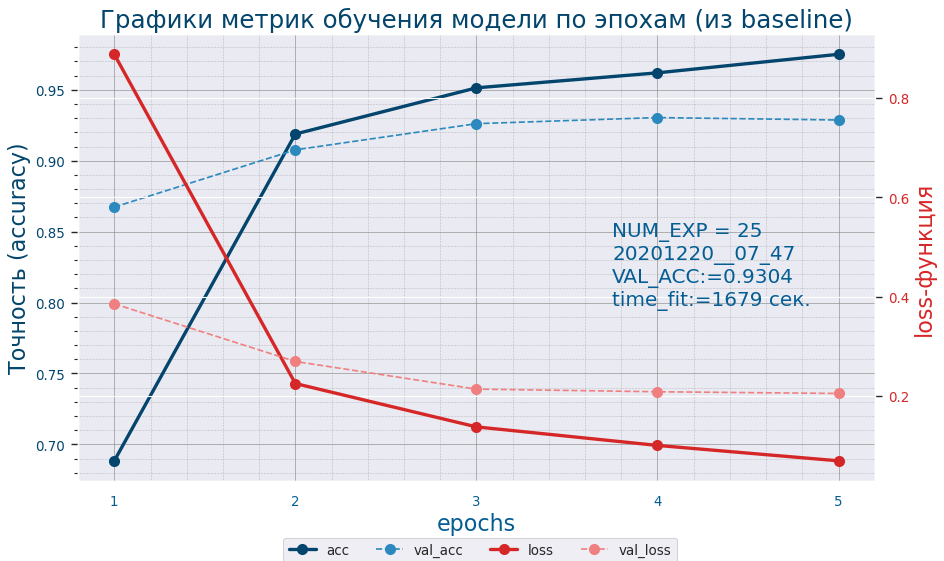

In [43]:
# рисуем графики точности и функции потерь по эпохам
# для удобства на графике номер экперимента, дата, время обучения и оценочная точность по вал выборке
utils.plot_acc_loss_fit_model_in_one (25, 
                                      results_of_exp,
                                      ' (из baseline)')

In [44]:
# выводим сводную информацию по гиперпараметрам и результатам 
utils.show_result_exp(25,
                      results_of_exp,
                      descr_hyperp_of_exp,
                      ' (baseline)')

Гиперпараметры и результаты обучения нейросети по эксперименту:= 25 (NUM_EXP) (baseline)


Значение  \
----Гиперпараметры аугментации----                             
AUG_ROTATION_RANGE                                         5   
AUG_BRIGHTNES_RANGE                               [0.5, 1.5]   
AUG_WIDTH_SHIFT_RANGE                                    0.1   
AUG_HEIGHT_SHIFT_RANGE                                   0.1   
AUG_HORIZONTAL_FLIP                                     True   
AUG_RESCALE                                       0.00392157   
AUG_VAL_SPLIT                                           0.15   
AUG_IMG_SIZE                                             224   
AUG_BATCH_SIZE                                            64   
AUG_TYPE                                  ImageDataGenerator   
----Гиперпараметры модели----                                  
M_BASE_TYPE                                         Xception   
M_EPOCHS                                                   5   
M_CALLBACKS_TYPE                                        MC_T   
M_EPOCHS_DROP                                              2   
M_LR_UPDATE                                         0.904837   
----Гиперпараметры головы----                                  
H_DROPOUT_RATE                                          0.25   
H_USE_BIAS                                           Default   
H_KERNEL_REG                                         Default   
H_BATCHNORM                                            False   
----Гиперпараметры компиляции----                              
C_LR                                                  0.0001   
C_LOSS_TYPE                         categorical_crossentropy   
----Результаты обучения----                                    
R_EVA_VAL_ACC                                       0.930442   
R_EPOCH_TIME_mean                                    335.814   
R_BATCH_TIME_mean                                      2.062   
R_TRAIN_TIME                                 [1679.19418907]   

                                                                             Описание  
----Гиперпараметры аугментации----                                                     
AUG_ROTATION_RANGE                        Диапазон для случайных поворотов в градусах  
AUG_BRIGHTNES_RANGE                           Диапазон выбора значения сдвига яркости  
AUG_WIDTH_SHIFT_RANGE                          Диапазон выбора значения сдвига ширины  
AUG_HEIGHT_SHIFT_RANGE                         Диапазон выбора значения сдвига высоты  
AUG_HORIZONTAL_FLIP                 Логическое значение для произвольного  перевор...  
AUG_RESCALE                         Коэффициент масштабирования. Мы умножаем данны...  
AUG_VAL_SPLIT                       Доля выборки оставляемой для валидации вне тре...  
AUG_IMG_SIZE                        Размер картинки, которую будем подавать в нейр...  
AUG_BATCH_SIZE                                                           Размер Batch  
AUG_TYPE                                                                          Тип  
----Гиперпараметры модели----                                                          
M_BASE_TYPE                                                        Тип базовой модели  
M_EPOCHS                                                  Кол-во эпох обучения модели  
M_CALLBACKS_TYPE                    Тип callback: MC - ModelCheckpoint, ES - Early...  
M_EPOCHS_DROP                       Кол-во эпох через которое LR изменяется внутри...  
M_LR_UPDATE                                       Коэфф изменения LR функции sheduler  
----Гиперпараметры головы----                                                          
H_DROPOUT_RATE                         Вероятность отключения нейронов в слое Dropout  
H_USE_BIAS                               Использование коэф Байес в полносвязном слое  
H_KERNEL_REG                        Использование специальной регуляризации в полн...  
H_BATCHNORM                                          Использование BatchNormalization  
----Гиперпараметры компиляции----          

***Резюме:***  
Это пример на базе baseline (Transfer learning - Xception) с которого начались многочисленные эксперименты по выбору базовой модели и оптимальных предварительных параметров для того чтобы перейти к тонкой настройке (Fine_Tuning).  

Результатом экспериментов стали предварительные параметры, которые использовались далее в обучении с переносом (Transfer learning). Можно выделить главные моменты по результатам предварительных экпериментов: 
- была выбрана базовая модель EfficientNetB3 
- BatchNormalization в архитектуре головы
- встроенная регуляризация *l2* паралельно со слоем DROPOUT (несмотря на то, что существует много мнений о том, что паралельно эти два момента это оверкил) по факту на этом примере вместе сработали хорошо. Без регуляризации и на региляризации *l1* скор хуже.
- полезный хак - удаление нейронов смещения из слоя (use_bias=False) перед BatchNormalization - позволяет экономить расчетные ресурсы и соответсвенно увеличивать скорость обучения

Эксперименты проводились в отдельном [ноутбуке](https://www.kaggle.com/sokolovaleks/sf-dst-10-car-classification-sokolov-3?scriptVersionId=50603588) для удобства. Кроме этого вы можете посмотреть результаты экспериментов в [датасете на github](https://github.com/alex-sokolov2011/skillfactory_rds/tree/master/module_7) или в [датасете на kaggle](https://www.kaggle.com/sokolovaleks/last-result).


# 7. Transfer learning с Fine-tuning
## 7.1 Этап 1. Замораживаем базовую часть модели полностью

In [45]:
# инициализируем новый эксперимент копированием гиперпараметров из предыдущего
# так как сесия не останавливалась
print('Инициализируем новый эксперимент Fine-Tuning (Этап 1):')
NUM_EXP = utils.new_exp_without_stop_session(results_of_exp)

Инициализируем новый эксперимент Fine-Tuning (Этап 1):
Новый эксперимент без завершения сессии инициализирован.
NUM_EXP = 58.0 ...


In [46]:
# назначаем новые гиперпараметры для аугментации исходя из оптимальных
# при повторном изменении константы необязательно указывать описание гиперпараметра 
# оно уже сохранено в словаре при инициализации
print('Назначаем новые гиперпараметры для аугментации исходя из оптимальных для Fine-Tuning (Этап 1)')
AUG_ROTATION_RANGE = utils.hyperp('AUG_ROTATION_RANGE', 
                                  10, 
                                  '',
                                  results_of_exp,
                                  descr_hyperp_of_exp)
AUG_IMG_SIZE = utils.hyperp('AUG_IMG_SIZE', 
                            320, 
                            '',
                            results_of_exp,
                            descr_hyperp_of_exp)
AUG_BATCH_SIZE = utils.hyperp('AUG_BATCH_SIZE', 
                              32, 
                              '',
                              results_of_exp,
                              descr_hyperp_of_exp)
AUG_VAL_SPLIT = utils.hyperp('AUG_VAL_SPLIT', 
                             0.05, 
                             '',
                             results_of_exp,
                             descr_hyperp_of_exp)
AUG_RESCALE = utils.hyperp('AUG_RESCALE', 
                           1, 
                           '',
                           results_of_exp,
                           descr_hyperp_of_exp)

Назначаем новые гиперпараметры для аугментации исходя из оптимальных для Fine-Tuning (Этап 1)
AUG_ROTATION_RANGE = 10 ...
AUG_IMG_SIZE = 320 ...
AUG_BATCH_SIZE = 32 ...
AUG_VAL_SPLIT = 0.05 ...
AUG_RESCALE = 1 ...


In [47]:
# генерируем новые аугментированные данные
train_generator, \
valid_generator, \
test_generator = utils.train_valid_test_generators(
                    AUG_ROTATION_RANGE,           
                    AUG_BRIGHTNES_RANGE,
                    AUG_WIDTH_SHIFT_RANGE, 
                    AUG_HEIGHT_SHIFT_RANGE,
                    AUG_HORIZONTAL_FLIP,
                    AUG_RESCALE,
                    AUG_VAL_SPLIT,
                    PATH_to_IMAGES_TRAIN,
                    PATH_to_IMAGES_TEST,
                    df_submit,
                    AUG_IMG_SIZE,
                    AUG_BATCH_SIZE,
                    RANDOM_SEED)

Found 14788 images belonging to 10 classes.
Found 773 images belonging to 10 classes.
Found 6675 validated image filenames.


In [48]:
print('Инициализируем новый тип базовой модели для Fine-Tuning (Этап 1)')
M_BASE_TYPE = utils.hyperp('M_BASE_TYPE', 
                           'EfficientNetB3', 
                           '',
                           results_of_exp,
                           descr_hyperp_of_exp)

Инициализируем новый тип базовой модели для Fine-Tuning (Этап 1)
M_BASE_TYPE = EfficientNetB3 ...


In [49]:
# загружаем базовую модель
base_model = EfficientNetB3(
                    weights='imagenet', 
                    include_top=False, 
                    input_shape = (AUG_IMG_SIZE, 
                                   AUG_IMG_SIZE, 
                                   3))

# отключаем обучаемость базовой модели
base_model.trainable = False

43941888/43941136 [==============================] - 0s 0us/step


In [50]:
print('Назначаем новые гиперпараметры для головы и компиляции модели для Fine-Tuning (Этап 1)')
H_DROPOUT_RATE =  utils.hyperp('H_DROPOUT_RATE', 
                               0.25, 
                               '',
                               results_of_exp,
                               descr_hyperp_of_exp)
H_USE_BIAS =  utils.hyperp('H_USE_BIAS', 
                           False, 
                           '',
                           results_of_exp,
                           descr_hyperp_of_exp)
H_KERNEL_REG = utils.hyperp('H_KERNEL_REG', 
                            'l2', 
                            '',
                            results_of_exp,
                            descr_hyperp_of_exp)
H_BATCHNORM =  utils.hyperp('H_BATCHNORM', 
                            True, 
                            '',
                            results_of_exp,
                            descr_hyperp_of_exp)
C_LR = utils.hyperp('C_LR', 
                    1e-3, 
                    '',
                    results_of_exp,
                    descr_hyperp_of_exp)
С_OPTIMIZER_TYPE = utils.hyperp('С_OPTIMIZER_TYPE', 
                                'Adam_amsgrad', 
                                '',
                                results_of_exp,
                                descr_hyperp_of_exp)
C_LOSS_TYPE = utils.hyperp('C_LOSS_TYPE', 
                           'categorical_crossentropy', 
                           'Компиляция модели. Тип функции потерь (loss-функции)',
                           results_of_exp,descr_hyperp_of_exp)

Назначаем новые гиперпараметры для головы и компиляции модели для Fine-Tuning (Этап 1)
H_DROPOUT_RATE = 0.25 ...
H_USE_BIAS = False ...
H_KERNEL_REG = l2 ...
H_BATCHNORM = True ...
C_LR = 0.001 ...
С_OPTIMIZER_TYPE = Adam_amsgrad ...
C_LOSS_TYPE = categorical_crossentropy ...


In [51]:
# архитектура головы (классификационные слои поверх базовой модели) 
# для Fine-Tuning (Этап 1)
head = S([GlobalAveragePooling2D(), 
          Dense(128, use_bias=H_USE_BIAS, kernel_regularizer=H_KERNEL_REG),
          BatchNormalization(axis=1), 
          Activation('relu'),
          Dropout(H_DROPOUT_RATE),
          Dense(10, activation='softmax')])


# Собираем модель используя подход перенос обучения (Transfer learning)
model = utils.model_assembler(base_model, 
                              head)

# Компилируем модель
model.compile(loss=C_LOSS_TYPE, 
              optimizer=optimizers.Adam(lr=C_LR, 
                                        amsgrad=True), 
              metrics=['accuracy'])

In [52]:
# выводим краткое описание модели по параметрам и слоям
utils.model_summary_short(model, 
                          base_model,
                          ' Fine-Tuning (Этап 1)')

Краткая информация о моделе Fine-Tuning (Этап 1):


Значение  \
--------Параметры модели -------                    
Всего параметров                       10,981,945   
Тренируемых параметров                    198,154   
Нетренируемых параметров               10,783,791   
--------Слои модели--------                         
Всего слоев                                   390   
Тренируемых слоев (не заморожен.)               6   
Нетренируемых слоев (заморожен.)              384   
.. среди них слоев bn                          78   
Номер первого тренируемого слоя               385   
--------Слои базовой модели--------                 
Всего слоев бм                                384   
Тренируемых слоев бм (не заморожен.)            0   
Нетренируемых слоев бм (заморожен.)           384   
... среди них слоев bn                         78   
% заморозки базовой модели                  100 %   
----Архитектура головы модели----                   
Всего слоев головы                              6   
Полносвязных слоев без выходного слоя           1   
BatchNormalization                           True   
Функция активации скрытого слоя              relu   
Функция активации выходного слоя          softmax   

                                                                          
--------Параметры модели -------            --------Params model--------  
Всего параметров                                            Total params  
Тренируемых параметров                                  Trainable params  
Нетренируемых параметров                            Non-trainable params  
--------Слои модели--------                 --------Layers model--------  
Всего слоев                                                 Total layers  
Тренируемых слоев (не заморожен.)           Trainable layers (no frozen)  
Нетренируемых слоев (заморожен.)           Non-trainable layers (frozen)  
.. среди них слоев bn                            .. among them layers bn  
Номер первого тренируемого слоя          Count num first trainable layer  
--------Слои базовой модели--------    --------Layers base model--------  
Всего слоев бм                                              Total layers  
Тренируемых слоев бм (не заморожен.)        Trainable layers (no frozen)  
Нетренируемых слоев бм (заморожен.)        Non-trainable layers (frozen)  
... среди них слоев bn                           .. among them layers bn  
% заморозки базовой модели                           % freeze base model  
----Архитектура головы модели----              ----Head architecture----  
Всего слоев головы                                          Total layers  
Полносвязных слоев без выходного слоя  Dense layers without output layer  
BatchNormalization                                    BatchNormalization  
Функция активации скрытого слоя         Activation func for hidden layer  
Функция активации выходного слоя        Activation func for output layer

In [53]:
print('Назначаем новые гиперпараметры для модели и обучения для Fine-Tuning (Этап 1)')
M_EPOCHS = utils.hyperp('M_EPOCHS', 
                        15, 
                        '',
                        results_of_exp,
                        descr_hyperp_of_exp)

M_CALLBACKS_TYPE = utils.hyperp('M_CALLBACKS_TYPE', 
                                'MC_ES_LRS_T', 
                                '',
                                results_of_exp,
                                descr_hyperp_of_exp)
M_EPOCHS_DROP = utils.hyperp('M_EPOCHS_DROP', 
                             1, 
                             '',
                             results_of_exp,
                             descr_hyperp_of_exp)
M_LR_UPDATE = utils.hyperp('M_LR_UPDATE', 
                           math.exp(-0.1), 
                           '',
                           results_of_exp,
                           descr_hyperp_of_exp)

Назначаем новые гиперпараметры для модели и обучения для Fine-Tuning (Этап 1)
M_EPOCHS = 15 ...
M_CALLBACKS_TYPE = MC_ES_LRS_T ...
M_EPOCHS_DROP = 1 ...
M_LR_UPDATE = 0.9048374180359595 ...


In [54]:
# инициализируем cb переменную и собираем списки cb 
time_cb = utils.TimingCallback()
callbacks_list = utils.callbacks_assembler(M_CALLBACKS_TYPE, 
                                           C_LR, 
                                           M_LR_UPDATE, 
                                           M_EPOCHS_DROP, 
                                           time_cb)

In [55]:
# код обучения закомментирован для удобства воспроизведения ноутбука
# ниже идет полная загрузка ранее сохраненной модели этого обучения
# и выводится картинка с прошлым процессом обучения для наглядности
# если вы захотите выполнить обучение модели, тогда закомментируйте код 
# загрузки ранее сохраненной лучшей из обученных моделей (строчкой ниже)

# # обучение модели для Fine-Tuning (Этап 1)
# right_steps_per_epoch = len(train_generator)

# history = model.fit_generator(train_generator,
#                               steps_per_epoch = right_steps_per_epoch,
#                               validation_data = valid_generator, 
#                               validation_steps = len(valid_generator),
#                               epochs = M_EPOCHS,
#                               callbacks = callbacks_list)

Загружена ранее сохраненная лучшая из обученных моделей Fine-Tuning (Этап 1)


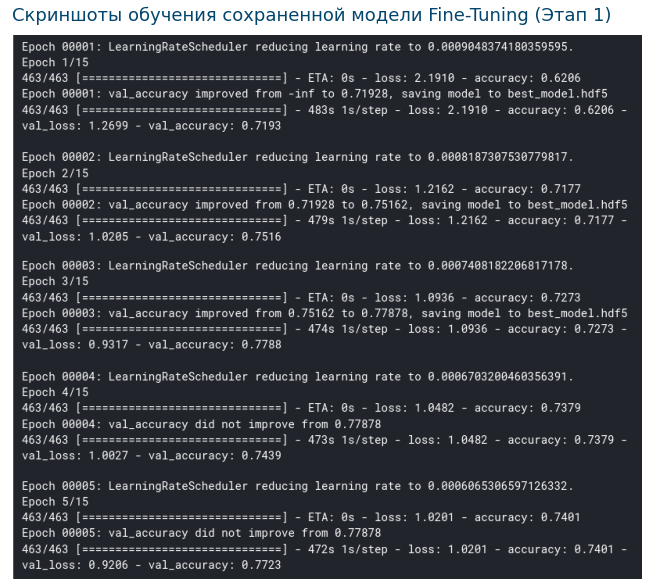

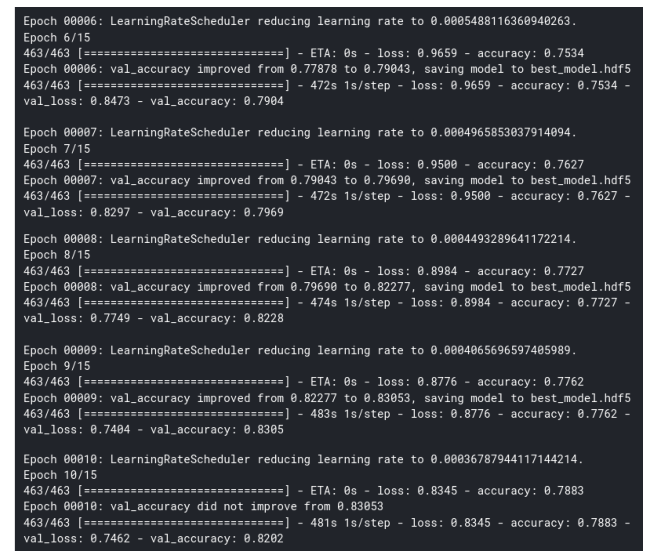

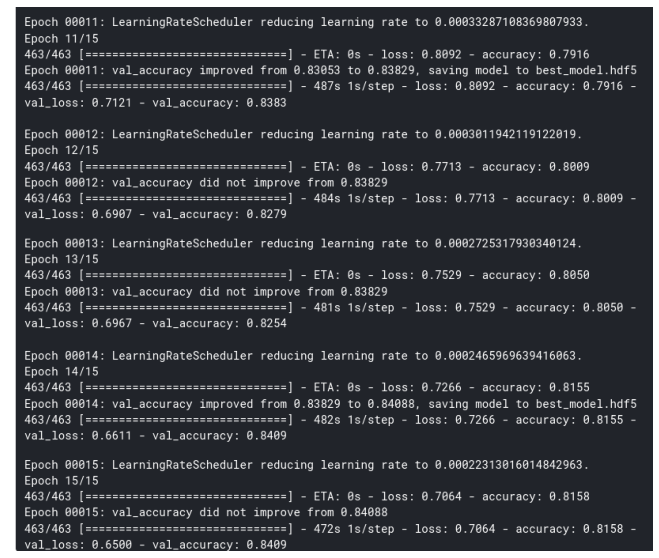

In [56]:
# # загрузка ранее выполненной и сохраненной модели Этапа 1 Fine-Tuning
model.load_weights('../input/last-result/best_model_36_20201224__12_36.hdf5')
print('Загружена ранее сохраненная лучшая из обученных моделей Fine-Tuning (Этап 1)')
utils.show_image('../input/last-result/pic_procces_model_fit_ft1_1.png',
                'Скриншоты обучения сохраненной модели Fine-Tuning (Этап 1)', 
                 14, 10,0.92)
utils.show_image('../input/last-result/pic_procces_model_fit_ft1_2.png',
                '', 14, 10, 0.9)
utils.show_image('../input/last-result/pic_procces_model_fit_ft1_3.png',
                '', 14, 10, 0.9)
history, time_cb = [], []
model.save('best_model.hdf5')

In [57]:
# загружаем лучшую модель и получаем значения метрик на валидационной выборке для результатов
print('Загружаем лучшую модель после обучения и проверяем метрики на валидационной выборке:')
model.load_weights('best_model.hdf5')
temp = model.evaluate_generator(valid_generator, verbose=1)

Загружаем лучшую модель после обучения и проверяем метрики на валидационной выборке:
25/25 [==============================] - 25s 992ms/step - loss: 0.6523 - accuracy: 0.8642


In [58]:
print('Сохраняем оценку метрики точности и значение функции потерь на лучшей моделе')
R_EVA_VAL_ACC = utils.hyperp('R_EVA_VAL_ACC', 
                             temp[1], 
                             '',
                             results_of_exp,
                             descr_hyperp_of_exp)
R_EVA_VAL_LOSS = utils.hyperp('R_EVA_VAL_LOSS', 
                             temp[0], 
                             '',
                             results_of_exp,
                             descr_hyperp_of_exp)

Сохраняем оценку метрики точности и значение функции потерь на лучшей моделе
R_EVA_VAL_ACC = 0.8641656041145325 ...
R_EVA_VAL_LOSS = 0.6523155570030212 ...


In [59]:
# сохраняем результаты обучения модели и всю лучшую модель
print('Cохраняем лучшую модель, ее параметры и результаты обучения:')
PATH_to_LAST_results_data = utils.save_model(PATH_to_WORKDIR,
                                             PATH_to_WORKDIR,
                                             model,
                                             history, 
                                             time_cb, 
                                             results_of_exp,
                                             descr_hyperp_of_exp,
                                             True)

Cохраняем лучшую модель, ее параметры и результаты обучения:


'zip_results_58_20210131__06_44.zip успешно создан. 0.2 Mb. Ссылка для скачивания ниже:'

/kaggle/working/zip_results_58_20210131__06_44.zip

'zip_model_58_20210131__06_44.zip успешно создан. 42.87 Mb. Ссылка для скачивания ниже:'

/kaggle/working/zip_model_58_20210131__06_44.zip

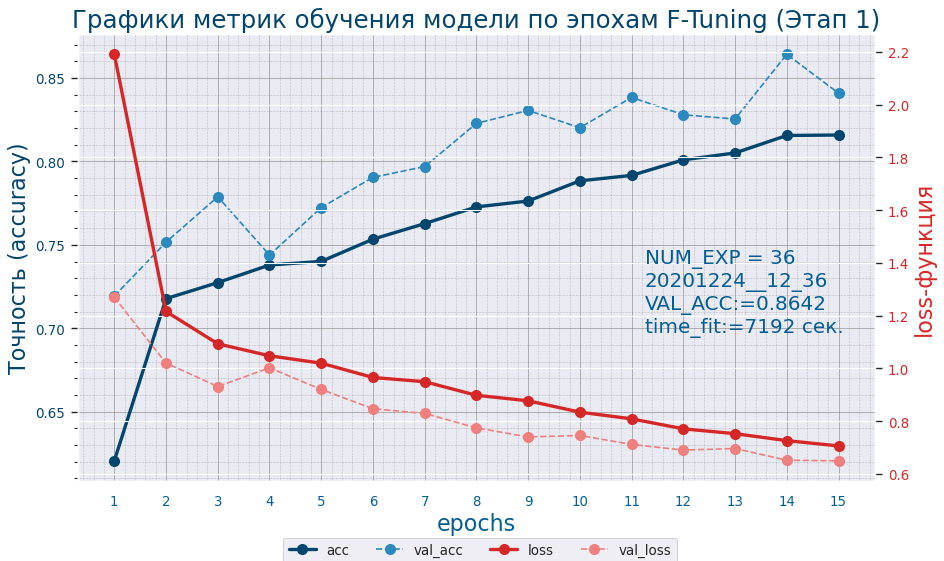

In [60]:
# рисуем графики точности и фнкции потерь по эпохам
# для удобства на графике номер экперимента, дата, время обучения и оценочная точность по вал выборке
utils.plot_acc_loss_fit_model_in_one (36, 
                                      results_of_exp,
                                      ' F-Tuning (Этап 1)')

In [61]:
# выводим сводную информацию по гиперпараметрам и результатам 
utils.show_result_exp(36,
                      results_of_exp,
                      descr_hyperp_of_exp,
                      ' F-T (Этап 1)')

Гиперпараметры и результаты обучения нейросети по эксперименту:= 36 (NUM_EXP) F-T (Этап 1)


Значение  \
----Гиперпараметры аугментации----                             
AUG_ROTATION_RANGE                                        10   
AUG_BRIGHTNES_RANGE                               [0.5, 1.5]   
AUG_WIDTH_SHIFT_RANGE                                    0.1   
AUG_HEIGHT_SHIFT_RANGE                                   0.1   
AUG_HORIZONTAL_FLIP                                     True   
AUG_RESCALE                                                1   
AUG_VAL_SPLIT                                           0.05   
AUG_IMG_SIZE                                             320   
AUG_BATCH_SIZE                                            32   
AUG_TYPE                                  ImageDataGenerator   
----Гиперпараметры модели----                                  
M_BASE_TYPE                                   EfficientNetB3   
M_EPOCHS                                                  15   
M_CALLBACKS_TYPE                                 MC_ES_LRS_T   
M_EPOCHS_DROP                                              1   
M_LR_UPDATE                                         0.904837   
----Гиперпараметры головы----                                  
H_DROPOUT_RATE                                          0.25   
H_USE_BIAS                                             False   
H_KERNEL_REG                                              l2   
H_BATCHNORM                                             True   
----Гиперпараметры компиляции----                              
C_LR                                                   0.001   
C_LOSS_TYPE                         categorical_crossentropy   
----Результаты обучения----                                    
R_EVA_VAL_ACC                                       0.864166   
R_EPOCH_TIME_mean                                    479.476   
R_BATCH_TIME_mean                                    2.35225   
R_TRAIN_TIME                                 [7192.40875268]   

                                                                             Описание  
----Гиперпараметры аугментации----                                                     
AUG_ROTATION_RANGE                        Диапазон для случайных поворотов в градусах  
AUG_BRIGHTNES_RANGE                           Диапазон выбора значения сдвига яркости  
AUG_WIDTH_SHIFT_RANGE                          Диапазон выбора значения сдвига ширины  
AUG_HEIGHT_SHIFT_RANGE                         Диапазон выбора значения сдвига высоты  
AUG_HORIZONTAL_FLIP                 Логическое значение для произвольного  перевор...  
AUG_RESCALE                         Коэффициент масштабирования. Мы умножаем данны...  
AUG_VAL_SPLIT                       Доля выборки оставляемой для валидации вне тре...  
AUG_IMG_SIZE                        Размер картинки, которую будем подавать в нейр...  
AUG_BATCH_SIZE                                                           Размер Batch  
AUG_TYPE                                                                          Тип  
----Гиперпараметры модели----                                                          
M_BASE_TYPE                                                        Тип базовой модели  
M_EPOCHS                                                  Кол-во эпох обучения модели  
M_CALLBACKS_TYPE                    Тип callback: MC - ModelCheckpoint, ES - Early...  
M_EPOCHS_DROP                       Кол-во эпох через которое LR изменяется внутри...  
M_LR_UPDATE                                       Коэфф изменения LR функции sheduler  
----Гиперпараметры головы----                                                          
H_DROPOUT_RATE                         Вероятность отключения нейронов в слое Dropout  
H_USE_BIAS                               Использование коэф Байес в полносвязном слое  
H_KERNEL_REG                        Использование специальной регуляризации в полн...  
H_BATCHNORM                                          Использование BatchNormalization  
----Гиперпараметры компиляции----          

***Резюме по Fine-Tuning Этап 1:***
- По графику точности валидационной выборки (val_acc сверху над acc) можно сделать вывод, что кол-во эпох подобрано не оптимально и у модели есть большой запас в обучении при увеличении эпох. Но в рамках выполнения первого проекта по глубокому обучению я решил ограничится 15 эпохами, чтобы лучше разобраться во всех инструментах и попытаться выжать максимум на 15 эпохах (и по объему не выше EfficientNetB3 = 48 MB).
- Забегая вперед среднее время обучения одной эпохи на 1 Этапе в среднем (480 сек) против (1650 сек) на дообучении на больших размерах фото, что наводит на мысль что на этом этапе сосредоточен самый важный момент успеха на лб. Рискну предположить, что лучшие результаты сингл моделей на лб были получены на большем кол-ве эпох и более сложных моделях выше EfficientNetB3
- на мой взгляд шаг подобран оптимально, необходимость в плато фиксированного LR я не увидел, так как графики имеют достаточно хороший наклон на данном кол-ве эпох. Замедление тенденции движения линии функции потерь заметно начиная с 14 эпохи, поэтому тем кто решит использовать большее кол-во эпох рекомендую зашить в sheduler плато фиксорованного шага на 2-3 эпохи
- валидация точности методом evalute и внутри метода fit_generator отличается. Но чтобы свести их к единообразию необходимо отказаться от мультисессионности (use_multiprocessing=False), но это увеличивает время обучения примерно на 20%. На этапе тонкой настроки не критично, но забегая вперед на дообучении где общее время обучения 19840 сек. это стало бы проблемой, а мне хотелось сохранить эдентичность гиперпараметров на обучении и на дообучении модели и менять только аугментацию и размер изображения.

## 7.2 Этап 2. Разморозка половины слоев базовой модели

In [62]:
# инициализируем новый эксперимент копированием гаперпараметров из предыдущего
# так как сесия не останавливалась
print('Инициализируем новый эксперимент Fine-Tuning (Этап 2):')
NUM_EXP = utils.new_exp_without_stop_session(results_of_exp)

Инициализируем новый эксперимент Fine-Tuning (Этап 2):
Новый эксперимент без завершения сессии инициализирован.
NUM_EXP = 59.0 ...


In [63]:
# размораживаем половину базовой модели начиная с 191 слоя когда начинается block5
# к сожалению на кагл нет возможности представить визуализацию нейросети с зумом, 
# чтобы показать вам замороженные слои и где проходит примерно половина этих слоев
# но это можно сделать по этой [ссылке](https://dgschwend.github.io/netscope/quickstart.html) 
# желательно перед заморозкой посмотреть на модель, 
# чтобы не провести линию заморозки между bn и activation
count_l = 0
for layer in base_model.layers:
    if (count_l >= 191) and (not isinstance(layer, BatchNormalization)): 
        layer.trainable = True
    count_l += 1

In [64]:
# назначаем новые гиперпараметры для компиляции модели
print('Назначаем новые гиперпараметры компиляции модели для Fine-Tuning (Этап 2)')
C_LR = utils.hyperp('C_LR', 1e-4, '',results_of_exp,descr_hyperp_of_exp)
# уменьшаем шаг

Назначаем новые гиперпараметры компиляции модели для Fine-Tuning (Этап 2)
C_LR = 0.0001 ...


In [65]:
# Собираем модель 
model = utils.model_assembler(base_model, 
                              head)

# Компилируем модель
model.compile(loss=C_LOSS_TYPE, 
              optimizer=optimizers.Adam(lr=C_LR, 
                                        amsgrad=True), 
              metrics=['accuracy'])

In [66]:
# выводим краткое описание модели по параметрам и слоям
utils.model_summary_short(model, 
                          base_model,
                          ' Fine-Tuning (Этап 2)')

Краткая информация о моделе Fine-Tuning (Этап 2):


Значение  \
--------Параметры модели -------                    
Всего параметров                       10,981,945   
Тренируемых параметров                 10,021,992   
Нетренируемых параметров                  959,953   
--------Слои модели--------                         
Всего слоев                                   390   
Тренируемых слоев (не заморожен.)             159   
Нетренируемых слоев (заморожен.)              231   
.. среди них слоев bn                          78   
Номер первого тренируемого слоя               192   
--------Слои базовой модели--------                 
Всего слоев бм                                384   
Тренируемых слоев бм (не заморожен.)          153   
Нетренируемых слоев бм (заморожен.)           231   
... среди них слоев bn                         78   
% заморозки базовой модели                   50 %   
----Архитектура головы модели----                   
Всего слоев головы                              6   
Полносвязных слоев без выходного слоя           1   
BatchNormalization                           True   
Функция активации скрытого слоя              relu   
Функция активации выходного слоя          softmax   

                                                                          
--------Параметры модели -------            --------Params model--------  
Всего параметров                                            Total params  
Тренируемых параметров                                  Trainable params  
Нетренируемых параметров                            Non-trainable params  
--------Слои модели--------                 --------Layers model--------  
Всего слоев                                                 Total layers  
Тренируемых слоев (не заморожен.)           Trainable layers (no frozen)  
Нетренируемых слоев (заморожен.)           Non-trainable layers (frozen)  
.. среди них слоев bn                            .. among them layers bn  
Номер первого тренируемого слоя          Count num first trainable layer  
--------Слои базовой модели--------    --------Layers base model--------  
Всего слоев бм                                              Total layers  
Тренируемых слоев бм (не заморожен.)        Trainable layers (no frozen)  
Нетренируемых слоев бм (заморожен.)        Non-trainable layers (frozen)  
... среди них слоев bn                           .. among them layers bn  
% заморозки базовой модели                           % freeze base model  
----Архитектура головы модели----              ----Head architecture----  
Всего слоев головы                                          Total layers  
Полносвязных слоев без выходного слоя  Dense layers without output layer  
BatchNormalization                                    BatchNormalization  
Функция активации скрытого слоя         Activation func for hidden layer  
Функция активации выходного слоя        Activation func for output layer

In [67]:
# инициализируем cb переменную и собираем списки cb 
time_cb = utils.TimingCallback()
callbacks_list = utils.callbacks_assembler(M_CALLBACKS_TYPE, 
                                           C_LR, 
                                           M_LR_UPDATE, 
                                           M_EPOCHS_DROP, 
                                           time_cb)

In [68]:
# загружаем сохраненную на 1 Этапе модель и проверяем точность
print('Загружаем сохраненную на 1 Этапе модель и проверяем точность')
model.load_weights('best_model.hdf5')
temp = model.evaluate_generator(valid_generator, verbose=1)

Загружаем сохраненную на 1 Этапе модель и проверяем точность
25/25 [==============================] - 24s 950ms/step - loss: 0.6567 - accuracy: 0.8318


In [69]:
# назначаем новые гиперпараметры для модели и обучения
print('Назначаем новые гиперпараметры для модели и обучения для Fine-Tuning (Этап 2)')
M_EPOCHS = utils.hyperp('M_EPOCHS', 12, '',results_of_exp,descr_hyperp_of_exp)

Назначаем новые гиперпараметры для модели и обучения для Fine-Tuning (Этап 2)
M_EPOCHS = 12 ...


In [70]:
# код обучения закомментирован для удобства воспроизведения ноутбука
# ниже идет полная загрузка ранее сохраненной модели этого обучения
# и выводится картинка с прошлым процессом обучения для наглядности
# если вы хотите выполнить обучение модели, закомментируйте код загрузки модели ниже

# # обучение модели для Fine-Tuning (Этап 2)
# right_steps_per_epoch = len(train_generator)

# history = model.fit_generator(train_generator,
#                               steps_per_epoch = right_steps_per_epoch,
#                               validation_data = valid_generator, 
#                               validation_steps = len(valid_generator),
#                               epochs = M_EPOCHS,
#                               callbacks = callbacks_list)

Загружена ранее сохраненная лучшая из обученных моделей Fine-Tuning (Этап 2)


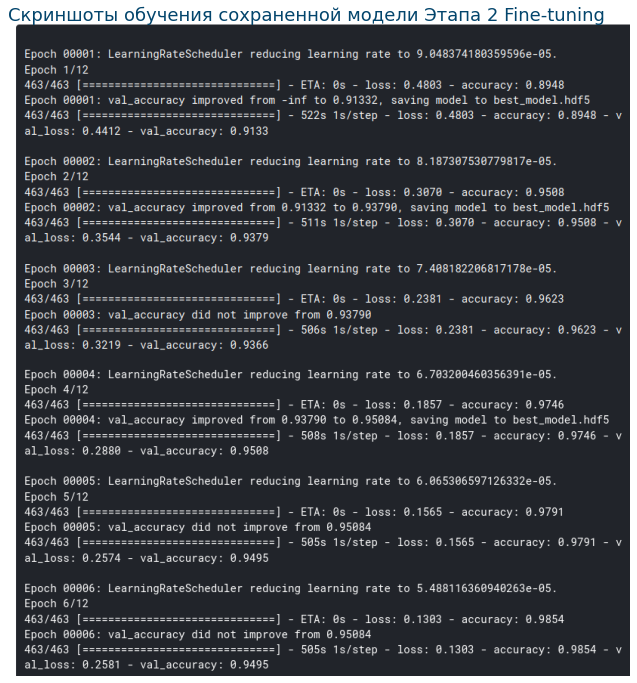

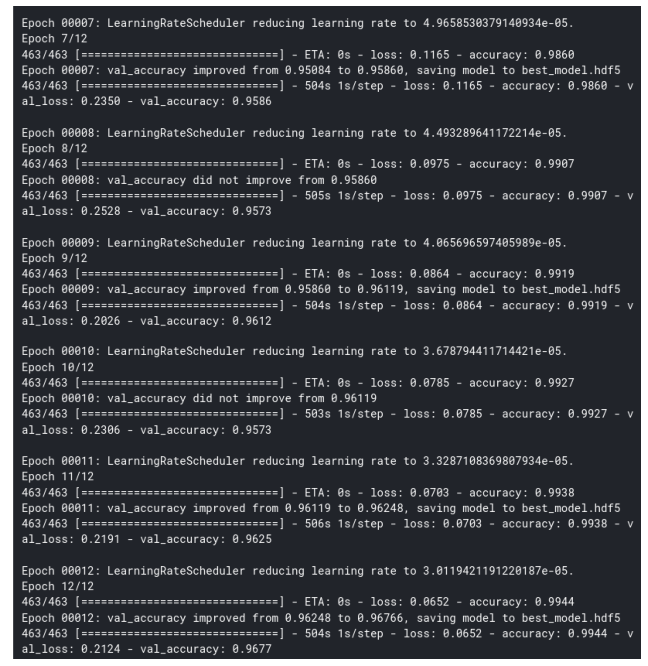

In [71]:
# загрузка ранее выполненной и сохраненной модели Этапа 2 Fine-Tuning
print('Загружена ранее сохраненная лучшая из обученных моделей Fine-Tuning (Этап 2)')
model.load_weights('../input/last-result/best_model_42_20201225__15_54.hdf5')
utils.show_image('../input/last-result/pic_procces_model_fit_ft2_1.png',
                'Скриншоты обучения сохраненной модели Этапа 2 Fine-tuning', 
                 14, 12, 0.90)
utils.show_image('../input/last-result/pic_procces_model_fit_ft2_2.png',
                '', 14, 12, 0.9)
history, time_cb = [], []
model.save('best_model.hdf5')

In [72]:
# загружаем лучшую модель и получаем значения метрик на валидационной выборке для результатов
print('Загружаем лучшую модель после обучения и проверяем метрики на валидационной выборке:')
model.load_weights('best_model.hdf5')
temp = model.evaluate_generator(valid_generator, verbose=1)

Загружаем лучшую модель после обучения и проверяем метрики на валидационной выборке:
25/25 [==============================] - 24s 951ms/step - loss: 0.2123 - accuracy: 0.9638


In [73]:
print('Сохраняем оценку метрики точности и значение функции потерь на лучшей моделе')
R_EVA_VAL_ACC = utils.hyperp('R_EVA_VAL_ACC', 
                             temp[1], 
                             '',
                             results_of_exp,
                             descr_hyperp_of_exp)
R_EVA_VAL_LOSS = utils.hyperp('R_EVA_VAL_LOSS', 
                             temp[0], 
                             '',
                             results_of_exp,
                             descr_hyperp_of_exp)

Сохраняем оценку метрики точности и значение функции потерь на лучшей моделе
R_EVA_VAL_ACC = 0.963777482509613 ...
R_EVA_VAL_LOSS = 0.21233443915843964 ...


In [74]:
# сохраняем результаты обучения модели и всю лучшую модель
print('Cохраняем лучшую модель, ее параметры и результаты обучения:')
PATH_to_LAST_results_data = utils.save_model(PATH_to_WORKDIR,
                                             PATH_to_WORKDIR,
                                             model,
                                             history, 
                                             time_cb, 
                                             results_of_exp,
                                             descr_hyperp_of_exp)

Cохраняем лучшую модель, ее параметры и результаты обучения:


'zip_results_59_20210131__06_45.zip успешно создан. 0.2 Mb. Ссылка для скачивания ниже:'

/kaggle/working/zip_results_59_20210131__06_45.zip

'zip_model_59_20210131__06_45.zip успешно создан. 42.87 Mb. Ссылка для скачивания ниже:'

/kaggle/working/zip_model_59_20210131__06_45.zip

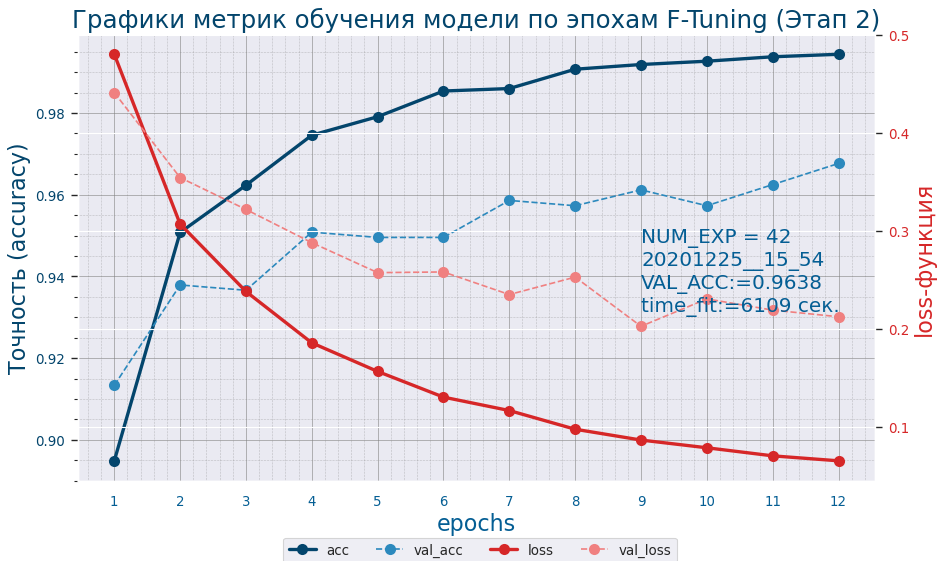

In [75]:
# рисуем графики точности и функции потерь по эпохам
# для удобства на графике номер экперимента, дата, время обучения и оценочная точность по вал выборке
utils.plot_acc_loss_fit_model_in_one (42, 
                                      results_of_exp,
                                      ' F-Tuning (Этап 2)')

In [76]:
# выводим сводную информацию по гиперпараметрам и результатам 
utils.show_result_exp(42,
                      results_of_exp,
                      descr_hyperp_of_exp,
                      ' F-T (Этап 2)')

Гиперпараметры и результаты обучения нейросети по эксперименту:= 42 (NUM_EXP) F-T (Этап 2)


Значение  \
----Гиперпараметры аугментации----                             
AUG_ROTATION_RANGE                                        10   
AUG_BRIGHTNES_RANGE                               [0.5, 1.5]   
AUG_WIDTH_SHIFT_RANGE                                    0.1   
AUG_HEIGHT_SHIFT_RANGE                                   0.1   
AUG_HORIZONTAL_FLIP                                     True   
AUG_RESCALE                                                1   
AUG_VAL_SPLIT                                           0.05   
AUG_IMG_SIZE                                             320   
AUG_BATCH_SIZE                                            32   
AUG_TYPE                                  ImageDataGenerator   
----Гиперпараметры модели----                                  
M_BASE_TYPE                                   EfficientNetB3   
M_EPOCHS                                                  12   
M_CALLBACKS_TYPE                                 MC_ES_LRS_T   
M_EPOCHS_DROP                                              1   
M_LR_UPDATE                                         0.904837   
----Гиперпараметры головы----                                  
H_DROPOUT_RATE                                          0.25   
H_USE_BIAS                                             False   
H_KERNEL_REG                                              l2   
H_BATCHNORM                                             True   
----Гиперпараметры компиляции----                              
C_LR                                                  0.0001   
C_LOSS_TYPE                         categorical_crossentropy   
----Результаты обучения----                                    
R_EVA_VAL_ACC                                       0.963777   
R_EPOCH_TIME_mean                                    509.071   
R_BATCH_TIME_mean                                    3.00751   
R_TRAIN_TIME                                 [6109.12062931]   

                                                                             Описание  
----Гиперпараметры аугментации----                                                     
AUG_ROTATION_RANGE                        Диапазон для случайных поворотов в градусах  
AUG_BRIGHTNES_RANGE                           Диапазон выбора значения сдвига яркости  
AUG_WIDTH_SHIFT_RANGE                          Диапазон выбора значения сдвига ширины  
AUG_HEIGHT_SHIFT_RANGE                         Диапазон выбора значения сдвига высоты  
AUG_HORIZONTAL_FLIP                 Логическое значение для произвольного  перевор...  
AUG_RESCALE                         Коэффициент масштабирования. Мы умножаем данны...  
AUG_VAL_SPLIT                       Доля выборки оставляемой для валидации вне тре...  
AUG_IMG_SIZE                        Размер картинки, которую будем подавать в нейр...  
AUG_BATCH_SIZE                                                           Размер Batch  
AUG_TYPE                                                                          Тип  
----Гиперпараметры модели----                                                          
M_BASE_TYPE                                                        Тип базовой модели  
M_EPOCHS                                                  Кол-во эпох обучения модели  
M_CALLBACKS_TYPE                    Тип callback: MC - ModelCheckpoint, ES - Early...  
M_EPOCHS_DROP                       Кол-во эпох через которое LR изменяется внутри...  
M_LR_UPDATE                                       Коэфф изменения LR функции sheduler  
----Гиперпараметры головы----                                                          
H_DROPOUT_RATE                         Вероятность отключения нейронов в слое Dropout  
H_USE_BIAS                               Использование коэф Байес в полносвязном слое  
H_KERNEL_REG                        Использование специальной регуляризации в полн...  
H_BATCHNORM                                          Использование BatchNormalization  
----Гиперпараметры компиляции----          

***Резюме по Fine-Tuning Этап 2:***
- По графику точности валидационной выборки можно сделать вывод, что кол-во эпох подобрано не оптимально так как точность и потери начали набирать темп. Наверняка стоило дообучить до 15 эпох и посмотреть что там, но мне было лень делать еще один эксперимент, потому что я заметил это только на этапе написания резюме.
- Среднее время выполнения пакета batch после разморозки половины базовой модели выросло на **27%** с 2.35 сек. до 3, среднее время выполнения эпохи выросло на **7%** с 479 до 509 сек. При этом общее время выполнения обучения сократилось до 6109 сек. с 7192, это связано с тем что колво эпох сократилось с 15 до 12. Увеличение среднего времени на эпохе всего на 7% очень вдохновляет, хотя кол-во тренируемых параметров выросло с 198154 до 10,021,992. Я это связываю с тем, что все-таки тренировка с нуля более трудоемкая операция и это видно на этом примере, что собственно еще раз подтверждает эффективность метода переноса обучения (Transfer learning)
- Этап 2 вырастил VAL_ACC на **12%** с 0.8642 до 0.9636 и снизило VAL_LOSS на **67%** с 0.6523 до 0.2123
- Шаг обучения подобран оптимально
- Проверил увеличение плато фиксированного LR до 2, но это не повлияло на результаты обучения
- sheduler показал оптимальный результат по формуле (LR * math.pow(LR_UPDATE, math.floor((1+epoch)/EPOCHS_DROP)) и при значении LR_UPDATE равном ***е*** в степени минус одна десятая

## 7.3 Этап 3. Разморозка всех слоев базовой модели

In [77]:
# инициализируем новый эксперимент копированием гаперпараметров из предыдущего
# так как сесия не останавливалась
print('Инициализируем новый эксперимент Fine-Tuning (Этап 3):')
NUM_EXP = utils.new_exp_without_stop_session(results_of_exp)

Инициализируем новый эксперимент Fine-Tuning (Этап 3):
Новый эксперимент без завершения сессии инициализирован.
NUM_EXP = 60.0 ...


In [78]:
# размораживаем ВСЮ базовую модель
for layer in base_model.layers:
    if not isinstance(layer, BatchNormalization): 
        layer.trainable = True

In [79]:
# назначаем новые гиперпараметры для компиляции модели
print('Назначаем новые гиперпараметры компиляции модели для Fine-Tuning (Этап 3)')
C_LR = utils.hyperp('C_LR', 
                    1e-5, 
                    '',
                    results_of_exp,
                    descr_hyperp_of_exp)
# уменьшаем шаг

Назначаем новые гиперпараметры компиляции модели для Fine-Tuning (Этап 3)
C_LR = 1e-05 ...


In [80]:
# Собираем модель 
model = utils.model_assembler(base_model, 
                              head)

# Компилируем модель
model.compile(loss=C_LOSS_TYPE, 
              optimizer=optimizers.Adam(lr=C_LR, 
                                        amsgrad=True), 
              metrics=['accuracy'])

In [81]:
# выводим краткое описание модели по параметрам и слоям
utils.model_summary_short(model, 
                          base_model,
                          ' Fine-Tuning (Этап 3)')

Краткая информация о моделе Fine-Tuning (Этап 3):


Значение  \
--------Параметры модели -------                    
Всего параметров                       10,981,945   
Тренируемых параметров                 10,807,090   
Нетренируемых параметров                  174,855   
--------Слои модели--------                         
Всего слоев                                   390   
Тренируемых слоев (не заморожен.)             312   
Нетренируемых слоев (заморожен.)               78   
.. среди них слоев bn                          78   
Номер первого тренируемого слоя                 1   
--------Слои базовой модели--------                 
Всего слоев бм                                384   
Тренируемых слоев бм (не заморожен.)          306   
Нетренируемых слоев бм (заморожен.)            78   
... среди них слоев bn                         78   
% заморозки базовой модели                    0 %   
----Архитектура головы модели----                   
Всего слоев головы                              6   
Полносвязных слоев без выходного слоя           1   
BatchNormalization                           True   
Функция активации скрытого слоя              relu   
Функция активации выходного слоя          softmax   

                                                                          
--------Параметры модели -------            --------Params model--------  
Всего параметров                                            Total params  
Тренируемых параметров                                  Trainable params  
Нетренируемых параметров                            Non-trainable params  
--------Слои модели--------                 --------Layers model--------  
Всего слоев                                                 Total layers  
Тренируемых слоев (не заморожен.)           Trainable layers (no frozen)  
Нетренируемых слоев (заморожен.)           Non-trainable layers (frozen)  
.. среди них слоев bn                            .. among them layers bn  
Номер первого тренируемого слоя          Count num first trainable layer  
--------Слои базовой модели--------    --------Layers base model--------  
Всего слоев бм                                              Total layers  
Тренируемых слоев бм (не заморожен.)        Trainable layers (no frozen)  
Нетренируемых слоев бм (заморожен.)        Non-trainable layers (frozen)  
... среди них слоев bn                           .. among them layers bn  
% заморозки базовой модели                           % freeze base model  
----Архитектура головы модели----              ----Head architecture----  
Всего слоев головы                                          Total layers  
Полносвязных слоев без выходного слоя  Dense layers without output layer  
BatchNormalization                                    BatchNormalization  
Функция активации скрытого слоя         Activation func for hidden layer  
Функция активации выходного слоя        Activation func for output layer

In [82]:
# инициализируем cb переменную и собираем списки cb 
time_cb = utils.TimingCallback()
callbacks_list = utils.callbacks_assembler(M_CALLBACKS_TYPE, 
                                           C_LR, 
                                           M_LR_UPDATE, 
                                           M_EPOCHS_DROP, 
                                           time_cb)

In [83]:
# загружаем сохраненную на 2 Этапе модель и проверяем точность 
print('Загружаем сохраненную на 2 Этапе модель и проверяем точность')
model.load_weights('best_model.hdf5')
temp = model.evaluate_generator(valid_generator, verbose=1)[1]

Загружаем сохраненную на 2 Этапе модель и проверяем точность
25/25 [==============================] - 24s 961ms/step - loss: 0.2202 - accuracy: 0.9586


In [84]:
# код обучения закомментирован для удобства воспроизведения ноутбука
# ниже идет полная загрузка ранее сохраненной модели этого обучения
# и выводится картинка с прошлым процессом обучения для наглядности
# если вы хотите выполнить обучение модели, закомментируйте код загрузки модели ниже

# # обучение модели Fine-Tuning (Этап 3)
# right_steps_per_epoch = len(train_generator)
# 
# history = model.fit_generator(train_generator,
#                               steps_per_epoch = right_steps_per_epoch,
#                               validation_data = valid_generator, 
#                               validation_steps = len(valid_generator),
#                               epochs = M_EPOCHS,
#                               callbacks = callbacks_list)

Загружена ранее сохраненная лучшая из обученных моделей Fine-Tuning (Этап 3)


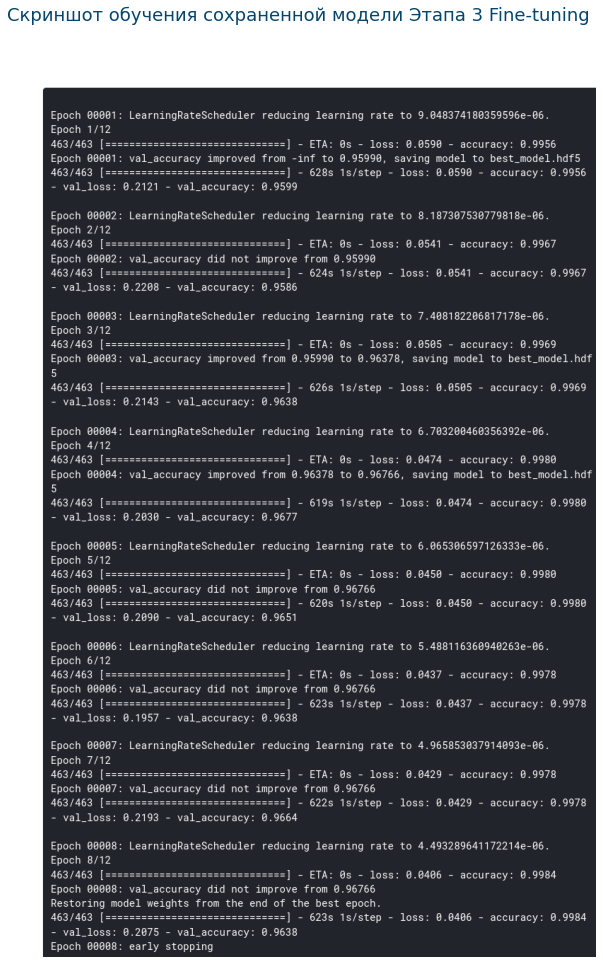

In [85]:
# загрузка ранее выполненной и сохраненной модели Этапа 3 Fine-Tuning
print('Загружена ранее сохраненная лучшая из обученных моделей Fine-Tuning (Этап 3)')
model.load_weights('../input/last-result/best_model_51_20201228__04_27.hdf5')
utils.show_image('../input/last-result/pic_procces_model_fit_ft3_1.png',
                'Скриншот обучения сохраненной модели Этапа 3 Fine-tuning', 
                 14, 16, 0.95)
history, time_cb = [], []
model.save('best_model.hdf5')

In [86]:
# загружаем лучшую модель и получаем значение оценки точности на валидационной выборке для результатов
print('Загружаем лучшую модель после обучения и проверяем метрики на валидационной выборке:')
model.load_weights('best_model.hdf5')
temp = model.evaluate_generator(valid_generator, verbose=1)

Загружаем лучшую модель после обучения и проверяем метрики на валидационной выборке:
25/25 [==============================] - 24s 962ms/step - loss: 0.1932 - accuracy: 0.9690


In [87]:
print('Сохраняем оценку метрики точности и значение функции потерь на лучшей моделе')
R_EVA_VAL_ACC = utils.hyperp('R_EVA_VAL_ACC', 
                             temp[1], 
                             '',
                             results_of_exp,
                             descr_hyperp_of_exp)
R_EVA_VAL_LOSS = utils.hyperp('R_EVA_VAL_LOSS', 
                             temp[0], 
                             '',
                             results_of_exp,
                             descr_hyperp_of_exp)

Сохраняем оценку метрики точности и значение функции потерь на лучшей моделе
R_EVA_VAL_ACC = 0.9689521193504333 ...
R_EVA_VAL_LOSS = 0.19324684143066406 ...


In [88]:
# сохраняем результаты обучения модели и всю лучшую модель
print('Cохраняем лучшую модель, ее параметры и результаты обучения:')
PATH_to_LAST_results_data = utils.save_model(PATH_to_WORKDIR,
                                             PATH_to_WORKDIR,
                                             model,
                                             history, 
                                             time_cb, 
                                             results_of_exp,
                                             descr_hyperp_of_exp)

Cохраняем лучшую модель, ее параметры и результаты обучения:


'zip_results_60_20210131__06_47.zip успешно создан. 0.21 Mb. Ссылка для скачивания ниже:'

/kaggle/working/zip_results_60_20210131__06_47.zip

'zip_model_60_20210131__06_47.zip успешно создан. 42.87 Mb. Ссылка для скачивания ниже:'

/kaggle/working/zip_model_60_20210131__06_47.zip

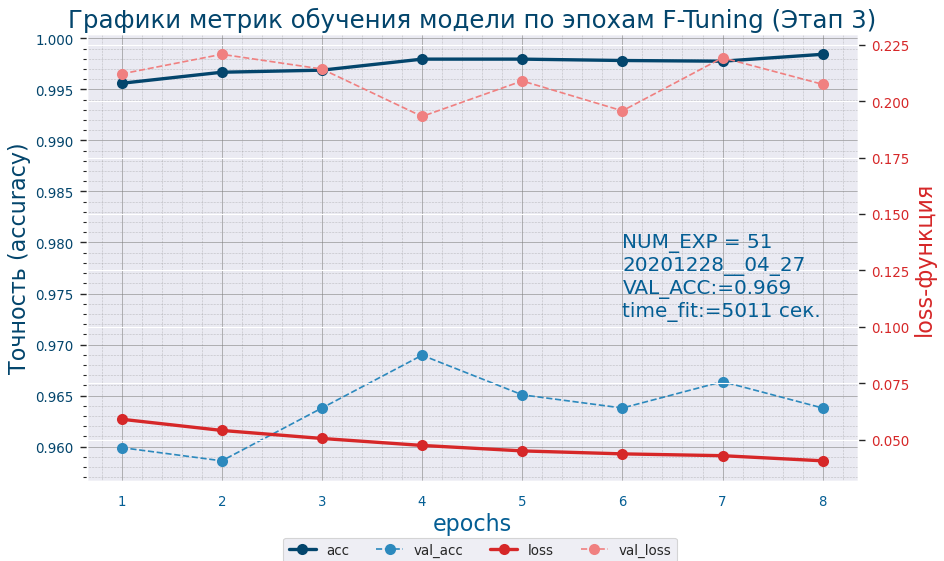

In [89]:
# рисуем графики точности и функции потерь по эпохам
# для удобства на графике номер экперимента, дата, время обучения и оценочная точность по вал выборке
utils.plot_acc_loss_fit_model_in_one (51, 
                                      results_of_exp,
                                      ' F-Tuning (Этап 3)')

In [90]:
# выводим сводную информацию по гиперпараметрам и результатам 
utils.show_result_exp(51,
                      results_of_exp,
                      descr_hyperp_of_exp,
                      ' F-T (Этап 3)')

Гиперпараметры и результаты обучения нейросети по эксперименту:= 51 (NUM_EXP) F-T (Этап 3)


Значение  \
----Гиперпараметры аугментации----                             
AUG_ROTATION_RANGE                                        10   
AUG_BRIGHTNES_RANGE                               [0.5, 1.5]   
AUG_WIDTH_SHIFT_RANGE                                    0.1   
AUG_HEIGHT_SHIFT_RANGE                                   0.1   
AUG_HORIZONTAL_FLIP                                     True   
AUG_RESCALE                                                1   
AUG_VAL_SPLIT                                           0.05   
AUG_IMG_SIZE                                             320   
AUG_BATCH_SIZE                                            32   
AUG_TYPE                                  ImageDataGenerator   
----Гиперпараметры модели----                                  
M_BASE_TYPE                                   EfficientNetB3   
M_EPOCHS                                                  12   
M_CALLBACKS_TYPE                                 MC_ES_LRS_T   
M_EPOCHS_DROP                                              1   
M_LR_UPDATE                                         0.904837   
----Гиперпараметры головы----                                  
H_DROPOUT_RATE                                          0.25   
H_USE_BIAS                                             False   
H_KERNEL_REG                                              l2   
H_BATCHNORM                                             True   
----Гиперпараметры компиляции----                              
C_LR                                                   1e-05   
C_LOSS_TYPE                         categorical_crossentropy   
----Результаты обучения----                                    
R_EVA_VAL_ACC                                       0.968952   
R_EPOCH_TIME_mean                                    626.359   
R_BATCH_TIME_mean                                    3.45607   
R_TRAIN_TIME                                 [5011.04681563]   

                                                                             Описание  
----Гиперпараметры аугментации----                                                     
AUG_ROTATION_RANGE                        Диапазон для случайных поворотов в градусах  
AUG_BRIGHTNES_RANGE                           Диапазон выбора значения сдвига яркости  
AUG_WIDTH_SHIFT_RANGE                          Диапазон выбора значения сдвига ширины  
AUG_HEIGHT_SHIFT_RANGE                         Диапазон выбора значения сдвига высоты  
AUG_HORIZONTAL_FLIP                 Логическое значение для произвольного  перевор...  
AUG_RESCALE                         Коэффициент масштабирования. Мы умножаем данны...  
AUG_VAL_SPLIT                       Доля выборки оставляемой для валидации вне тре...  
AUG_IMG_SIZE                        Размер картинки, которую будем подавать в нейр...  
AUG_BATCH_SIZE                                                           Размер Batch  
AUG_TYPE                                                                          Тип  
----Гиперпараметры модели----                                                          
M_BASE_TYPE                                                        Тип базовой модели  
M_EPOCHS                                                  Кол-во эпох обучения модели  
M_CALLBACKS_TYPE                    Тип callback: MC - ModelCheckpoint, ES - Early...  
M_EPOCHS_DROP                       Кол-во эпох через которое LR изменяется внутри...  
M_LR_UPDATE                                       Коэфф изменения LR функции sheduler  
----Гиперпараметры головы----                                                          
H_DROPOUT_RATE                         Вероятность отключения нейронов в слое Dropout  
H_USE_BIAS                               Использование коэф Байес в полносвязном слое  
H_KERNEL_REG                        Использование специальной регуляризации в полн...  
H_BATCHNORM                                          Использование BatchNormalization  
----Гиперпараметры компиляции----          

***Резюме по Fine-Tuning Этап 3:***
- Кол-во эпох подобрано оптимально (на последней эпохе остановка из-за отсутствия роста на 4 эпохах)
- Этап 3 вырастил VAL_ACC на **0.13%** с 0.9636 до 0.9689 и снизило VAL_LOSS на **9%** с 0.2123 до 0.1932
- Среднее время выполнения по сравнению с предыдущим этапом: пакета batch после полной разморозки базовой модели выросло на **15%** с 3 сек. до 3.45, среднее время выполнения эпохи выросло на **22%** с 509 до 626 сек, общее время выполнения обучения сократилось до 5011 с 6109, но это было связано к 8 эпохами из-за раннего стопа по Callback
- Шаг обучения подобран оптимально
- Проверил увеличение плато фиксированного LR до 2, но это не повлияло на результаты обучения
- sheduler показал оптимальный результат по формуле (LR * math.pow(LR_UPDATE, math.floor((1+epoch)/EPOCHS_DROP)) и при значении LR_UPDATE равном е в степени минус одна десятая

## 7.4 Визуализация результатов Fine-Tuning

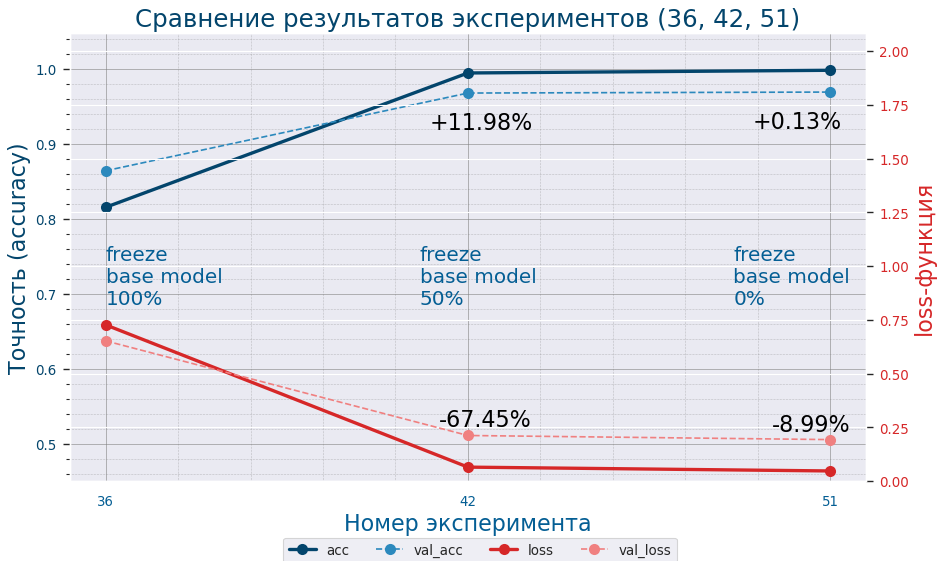

In [91]:
# выводим график сравнения точности и функции потерь 
# по разным этапам тонкой настройки
utils.plot_res_dif_exp_in_one([36,42,51],
                              ['freeze\nbase model\n100%', 
                               'freeze\nbase model\n50%', 
                               'freeze\nbase model\n0%'],
                              results_of_exp,
                              0.4)

# 8. Дообучение модели на увеличенном размере изображения (Extra Fit)
## 8.1 Создание модели и обучение

In [92]:
# инициализируем новый эксперимент копированием гаперпараметров из предыдущего
# так как сесия не останавливалась
print('Инициализируем новый эксперимент Extra Fit (size+):')
NUM_EXP = utils.new_exp_without_stop_session(results_of_exp)

Инициализируем новый эксперимент Extra Fit (size+):
Новый эксперимент без завершения сессии инициализирован.
NUM_EXP = 61.0 ...


In [93]:
# назначаем новые гиперпараметры для аугментации исходя из оптимальных
# при повторном изменении константы необязательно указывать описание гиперпараметра 
# оно уже сохранено в словаре при инициализации
print('Назначаем новые гиперпараметры для аугментации исходя из оптимальных для Extra Fit (size+)')
AUG_IMG_SIZE = utils.hyperp('AUG_IMG_SIZE', 
                            520, 
                            '',
                            results_of_exp,
                            descr_hyperp_of_exp)
AUG_BATCH_SIZE = utils.hyperp('AUG_BATCH_SIZE', 
                              12, 
                              '',
                              results_of_exp,
                              descr_hyperp_of_exp)
# пришлось уменьшить batch до максимально возможного чтобы уложиться в 16ГБ Tesla P100

Назначаем новые гиперпараметры для аугментации исходя из оптимальных для Extra Fit (size+)
AUG_IMG_SIZE = 520 ...
AUG_BATCH_SIZE = 12 ...


In [94]:
# генерируем новые аугментированные данные
train_generator, \
valid_generator, \
test_generator = utils.train_valid_test_generators(
                    AUG_ROTATION_RANGE,           
                    AUG_BRIGHTNES_RANGE,
                    AUG_WIDTH_SHIFT_RANGE, 
                    AUG_HEIGHT_SHIFT_RANGE,
                    AUG_HORIZONTAL_FLIP,
                    AUG_RESCALE,
                    AUG_VAL_SPLIT,
                    PATH_to_IMAGES_TRAIN,
                    PATH_to_IMAGES_TEST,
                    df_submit,
                    AUG_IMG_SIZE,
                    AUG_BATCH_SIZE,
                    RANDOM_SEED)

Found 14788 images belonging to 10 classes.
Found 773 images belonging to 10 classes.
Found 6675 validated image filenames.


In [95]:
# загружаем базовую модель заново на новых размерах фото
base_model = EfficientNetB3(
                    weights='imagenet', 
                    include_top=False, 
                    input_shape = (AUG_IMG_SIZE, 
                                   AUG_IMG_SIZE, 
                                   3))

In [96]:
# назначаем новые гиперпараметры для головы и компиляции модели
print('Назначаем новые гиперпараметры компиляции модели для Extra Fit (size+)')
C_LR = utils.hyperp('C_LR', 
                    1e-4, 
                    '',
                    results_of_exp,
                    descr_hyperp_of_exp)
# увеличиваем шаг так как эксперимент показал что на шаге с 3 этапа модель 
# не чувствительна и не успевает обучится за 12 эпох

Назначаем новые гиперпараметры компиляции модели для Extra Fit (size+)
C_LR = 0.0001 ...


In [97]:
# архитектура головы (классификационные слои поверх базовой модели)
head = S([GlobalAveragePooling2D(), 
          Dense(128, use_bias=H_USE_BIAS, kernel_regularizer=H_KERNEL_REG),
          BatchNormalization(axis=1), 
          Activation('relu'),
          Dropout(H_DROPOUT_RATE),
          Dense(10, activation='softmax')])


# Собираем модель используя подход перенос обучения (Transfer learning)
model = utils.model_assembler(base_model, head)

# Компилируем модель
model.compile(loss=C_LOSS_TYPE, 
              optimizer=optimizers.Adam(lr=C_LR, 
                                        amsgrad=True), 
              metrics=['accuracy'])

In [98]:
# выводим краткое описание модели по параметрам и слоям
utils.model_summary_short(model, 
                          base_model,
                          ' Extra Fit (size+)')

Краткая информация о моделе Extra Fit (size+):


Значение  \
--------Параметры модели -------                    
Всего параметров                       10,981,945   
Тренируемых параметров                 10,894,386   
Нетренируемых параметров                   87,559   
--------Слои модели--------                         
Всего слоев                                   390   
Тренируемых слоев (не заморожен.)             390   
Нетренируемых слоев (заморожен.)                0   
.. среди них слоев bn                           0   
Номер первого тренируемого слоя                 1   
--------Слои базовой модели--------                 
Всего слоев бм                                384   
Тренируемых слоев бм (не заморожен.)          384   
Нетренируемых слоев бм (заморожен.)             0   
... среди них слоев bn                          0   
% заморозки базовой модели                    0 %   
----Архитектура головы модели----                   
Всего слоев головы                              6   
Полносвязных слоев без выходного слоя           1   
BatchNormalization                           True   
Функция активации скрытого слоя              relu   
Функция активации выходного слоя          softmax   

                                                                          
--------Параметры модели -------            --------Params model--------  
Всего параметров                                            Total params  
Тренируемых параметров                                  Trainable params  
Нетренируемых параметров                            Non-trainable params  
--------Слои модели--------                 --------Layers model--------  
Всего слоев                                                 Total layers  
Тренируемых слоев (не заморожен.)           Trainable layers (no frozen)  
Нетренируемых слоев (заморожен.)           Non-trainable layers (frozen)  
.. среди них слоев bn                            .. among them layers bn  
Номер первого тренируемого слоя          Count num first trainable layer  
--------Слои базовой модели--------    --------Layers base model--------  
Всего слоев бм                                              Total layers  
Тренируемых слоев бм (не заморожен.)        Trainable layers (no frozen)  
Нетренируемых слоев бм (заморожен.)        Non-trainable layers (frozen)  
... среди них слоев bn                           .. among them layers bn  
% заморозки базовой модели                           % freeze base model  
----Архитектура головы модели----              ----Head architecture----  
Всего слоев головы                                          Total layers  
Полносвязных слоев без выходного слоя  Dense layers without output layer  
BatchNormalization                                    BatchNormalization  
Функция активации скрытого слоя         Activation func for hidden layer  
Функция активации выходного слоя        Activation func for output layer

In [99]:
# загружаем сохраненную на 3 Этапе модель и проверяем точность 
print('Загружаем сохраненную на 3 Этапе модель и проверяем точность')
model.load_weights('best_model.hdf5')
temp = model.evaluate_generator(valid_generator, verbose=1)

Загружаем сохраненную на 3 Этапе модель и проверяем точность
65/65 [==============================] - 60s 931ms/step - loss: 0.2105 - accuracy: 0.9599


In [100]:
# увеливаем плато фиксированного LR, чтобы модель успела обучиться за две эпохи
print('Назначаем новые гиперпараметры для модели и обучения для Extra Fit (size+)')
M_EPOCHS_DROP = utils.hyperp('M_EPOCHS_DROP', 
                             2, '',
                             results_of_exp,
                             descr_hyperp_of_exp)

Назначаем новые гиперпараметры для модели и обучения для Extra Fit (size+)
M_EPOCHS_DROP = 2 ...


In [101]:
# инициализируем cb переменную и собираем списки cb 
time_cb = utils.TimingCallback()
callbacks_list = utils.callbacks_assembler(M_CALLBACKS_TYPE, 
                                           C_LR, 
                                           M_LR_UPDATE, 
                                           M_EPOCHS_DROP, 
                                           time_cb)

In [102]:
# код обучения закомментирован для удобства воспроизведения ноутбука
# ниже идет полная загрузка ранее сохраненной модели этого обучения
# и выводится картинка с прошлым процессом обучения для наглядности
# если вы хотите выполнить обучение модели, закомментируйте код загрузки модели ниже

# # обучение модели для Extra Fit (size+)
# right_steps_per_epoch = len(train_generator)
# 
# history = model.fit_generator(train_generator,
#                               steps_per_epoch = right_steps_per_epoch,
#                               validation_data = valid_generator, 
#                               validation_steps = len(valid_generator),
#                               epochs = M_EPOCHS,
#                               callbacks = callbacks_list)

Загружена ранее сохраненная лучшая из обученных моделей Extra Fit (size+)


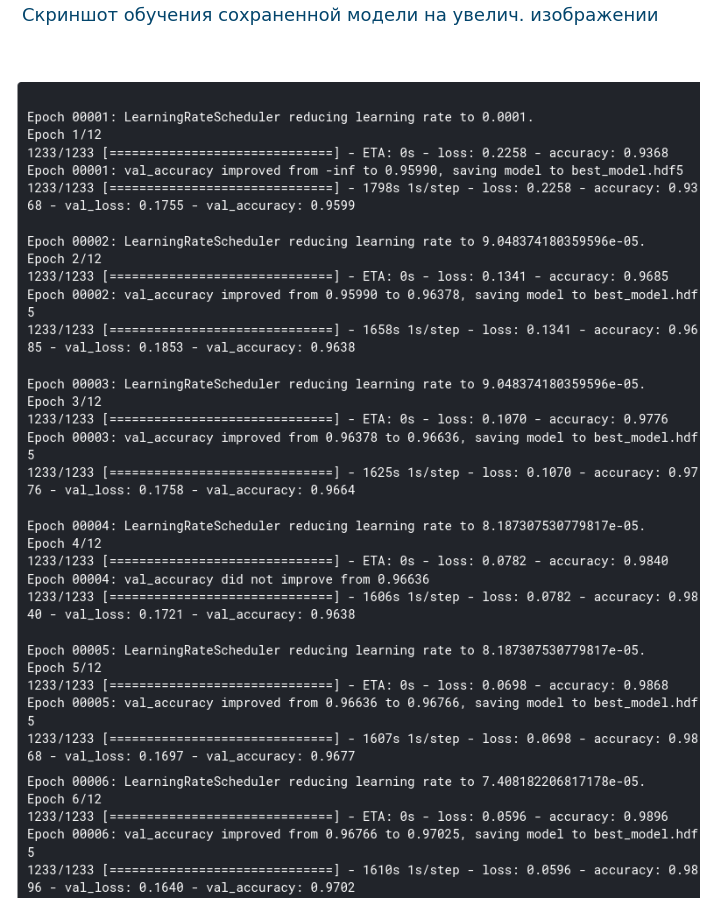

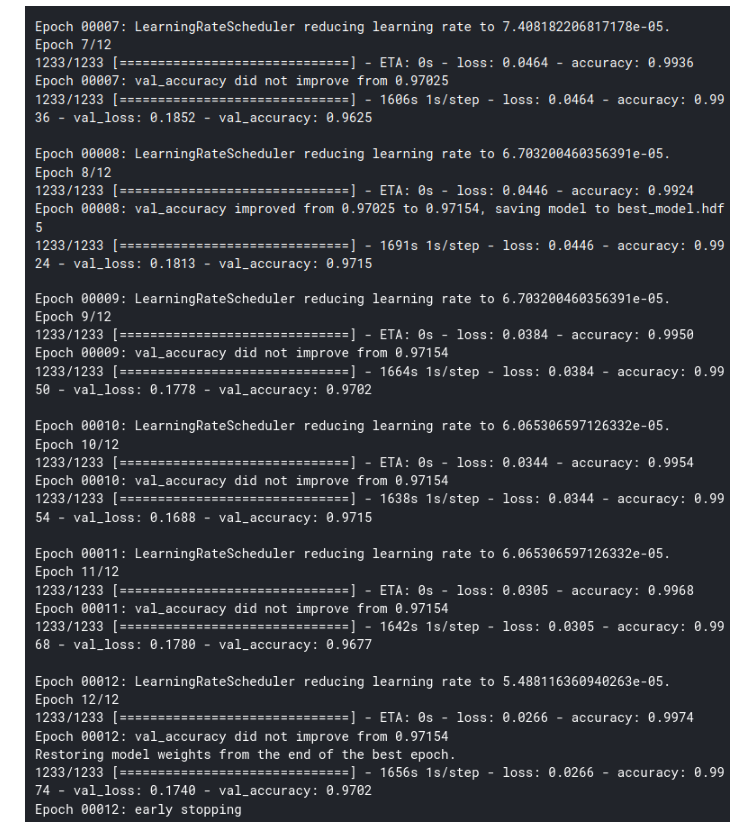

In [103]:
# загрузка ранее выполненной и сохраненной модели на увелич изображении 520
print('Загружена ранее сохраненная лучшая из обученных моделей Extra Fit (size+)')
model.load_weights('../input/last-result/best_model_56_20201231__11_36.hdf5')
utils.show_image('../input/last-result/pic_procces_model_fit_520_1.png',
                'Скриншот обучения сохраненной модели на увелич. изображении', 
                 14, 15, 0.95)
utils.show_image('../input/last-result/pic_procces_model_fit_520_2.png',
                '', 
                 14, 15, 0.95)
history, time_cb = [], []
model.save('best_model.hdf5')

In [104]:
# загружаем лучшую модель и получаем значение оценки точности на валидационной выборке для результатов
print('Загружаем лучшую модель после обучения и проверяем метрики на валидационной выборке:')
model.load_weights('best_model.hdf5')
temp = model.evaluate_generator(valid_generator, verbose=1)

Загружаем лучшую модель после обучения и проверяем метрики на валидационной выборке:
65/65 [==============================] - 61s 935ms/step - loss: 0.1698 - accuracy: 0.9741


In [105]:
print('Сохраняем оценку метрики точности и значение функции потерь на лучшей моделе')
R_EVA_VAL_ACC = utils.hyperp('R_EVA_VAL_ACC', 
                             temp[1], 
                             '',
                             results_of_exp,
                             descr_hyperp_of_exp)
R_EVA_VAL_LOSS = utils.hyperp('R_EVA_VAL_LOSS', 
                             temp[0], 
                             '',
                             results_of_exp,
                             descr_hyperp_of_exp)

Сохраняем оценку метрики точности и значение функции потерь на лучшей моделе
R_EVA_VAL_ACC = 0.9741267561912537 ...
R_EVA_VAL_LOSS = 0.16981151700019836 ...


In [106]:
# сохраняем результаты обучения модели и всю лучшую модель
print('Cохраняем лучшую модель, ее параметры и результаты обучения:')
PATH_to_LAST_results_data = utils.save_model(PATH_to_WORKDIR,
                                             PATH_to_WORKDIR,
                                             model,
                                             history, 
                                             time_cb, 
                                             results_of_exp,
                                             descr_hyperp_of_exp)

Cохраняем лучшую модель, ее параметры и результаты обучения:


'zip_results_61_20210131__06_49.zip успешно создан. 0.21 Mb. Ссылка для скачивания ниже:'

/kaggle/working/zip_results_61_20210131__06_49.zip

'zip_model_61_20210131__06_49.zip успешно создан. 42.87 Mb. Ссылка для скачивания ниже:'

/kaggle/working/zip_model_61_20210131__06_49.zip

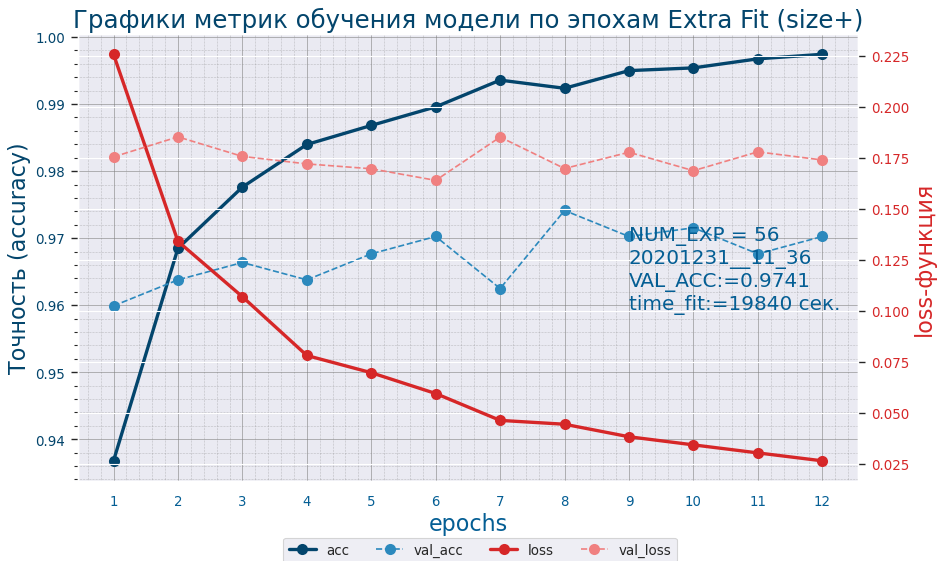

In [107]:
# рисуем графики точности и функции потерь по эпохам
# для удобства на графике номер эксперимента, дата, время обучения и оценочная точность по вал выборке
utils.plot_acc_loss_fit_model_in_one (56, 
                                      results_of_exp,
                                      ' Extra Fit (size+)')

In [108]:
# выводим сводную информацию по гиперпараметрам и результатам 
utils.show_result_exp(56,
                      results_of_exp,
                      descr_hyperp_of_exp,
                      ' Extra Fit')

Гиперпараметры и результаты обучения нейросети по эксперименту:= 56 (NUM_EXP) Extra Fit


Значение  \
----Гиперпараметры аугментации----                             
AUG_ROTATION_RANGE                                        10   
AUG_BRIGHTNES_RANGE                               [0.5, 1.5]   
AUG_WIDTH_SHIFT_RANGE                                    0.1   
AUG_HEIGHT_SHIFT_RANGE                                   0.1   
AUG_HORIZONTAL_FLIP                                     True   
AUG_RESCALE                                                1   
AUG_VAL_SPLIT                                           0.05   
AUG_IMG_SIZE                                             520   
AUG_BATCH_SIZE                                            12   
AUG_TYPE                                  ImageDataGenerator   
----Гиперпараметры модели----                                  
M_BASE_TYPE                                   EfficientNetB3   
M_EPOCHS                                                  12   
M_CALLBACKS_TYPE                                 MC_ES_LRS_T   
M_EPOCHS_DROP                                              2   
M_LR_UPDATE                                         0.904837   
----Гиперпараметры головы----                                  
H_DROPOUT_RATE                                          0.25   
H_USE_BIAS                                             False   
H_KERNEL_REG                                              l2   
H_BATCHNORM                                             True   
----Гиперпараметры компиляции----                              
C_LR                                                  0.0001   
C_LOSS_TYPE                         categorical_crossentropy   
----Результаты обучения----                                    
R_EVA_VAL_ACC                                       0.974127   
R_EPOCH_TIME_mean                                    1653.36   
R_BATCH_TIME_mean                                    4.42205   
R_TRAIN_TIME                                [19840.56145787]   

                                                                             Описание  
----Гиперпараметры аугментации----                                                     
AUG_ROTATION_RANGE                        Диапазон для случайных поворотов в градусах  
AUG_BRIGHTNES_RANGE                           Диапазон выбора значения сдвига яркости  
AUG_WIDTH_SHIFT_RANGE                          Диапазон выбора значения сдвига ширины  
AUG_HEIGHT_SHIFT_RANGE                         Диапазон выбора значения сдвига высоты  
AUG_HORIZONTAL_FLIP                 Логическое значение для произвольного  перевор...  
AUG_RESCALE                         Коэффициент масштабирования. Мы умножаем данны...  
AUG_VAL_SPLIT                       Доля выборки оставляемой для валидации вне тре...  
AUG_IMG_SIZE                        Размер картинки, которую будем подавать в нейр...  
AUG_BATCH_SIZE                                                           Размер Batch  
AUG_TYPE                                                                          Тип  
----Гиперпараметры модели----                                                          
M_BASE_TYPE                                                        Тип базовой модели  
M_EPOCHS                                                  Кол-во эпох обучения модели  
M_CALLBACKS_TYPE                    Тип callback: MC - ModelCheckpoint, ES - Early...  
M_EPOCHS_DROP                       Кол-во эпох через которое LR изменяется внутри...  
M_LR_UPDATE                                       Коэфф изменения LR функции sheduler  
----Гиперпараметры головы----                                                          
H_DROPOUT_RATE                         Вероятность отключения нейронов в слое Dropout  
H_USE_BIAS                               Использование коэф Байес в полносвязном слое  
H_KERNEL_REG                        Использование специальной регуляризации в полн...  
H_BATCHNORM                                          Использование BatchNormalization  
----Гиперпараметры компиляции----          

## 8.2 Резюме по дообучению на увеличенном размере
- Дообучение вырастило VAL_ACC на **0.52%** с 0.969 до 0.9741 и снизило VAL_LOSS на **15%** с 0.1932 до 0.1698
- Кол-во эпох подобрано оптимально (на последней эпохе остановка из-за отсутсвия роста на 4 эпохах)
- Увеличение плато фиксированного LR положительно повлияло на обучение, так как именно на втором круге достигались оптимальные значения
- Общее время обучения модели составило 38152 сек. (=7192+6109+5011+19840). Это примерно 10.5 часов.

# 9. Формируем файл с предсказанием на тесте


# 10. Результаты:  
- score на kaggle = 11.15199 (6 место) 


К сожалению не хватило времени, чтобы:  
